In [53]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines
import matplotlib.ticker as mticker
import matplotlib.lines as mlines

In [4]:


def extract_metrics(content):

    patterns = {
        "Only_KNAPSACK_efficiency": r"Only KNAPSACK\s+efficiency:\s+([\d.]+)",
        "Final_Knapsack_time": r"Final Knapsack time:\s+([\d.]+)",
        "Only_SFC_efficiency": r"Only SFC\s+efficiency:\s+([\d.]+)",
        "Final_SFC_time": r"Final SFC time:\s+([\d.]+)",
        "SFC_painterPartition_efficiency": r"SFC\+painterPartition\s+efficiency:\s+([\d.]+)",
        "Final_SFC_Painter_time": r"Final SFC\+Painter time:\s+([\d.]+)",
        "SFC_Knapsack_combined_efficiency": r"SFC\+Knapsack combined efficiency:\s+([\d.]+)",
        "Final_SFC_Knapsack_Combined_time": r"Final SFC\+Knapsack_Combined time:\s+([\d.]+)",
    }

    run_sections = re.split(r"=== Starting Run \d+ ===", content)[1:]  
    data = []

    for run_id, section in enumerate(run_sections, start=1):
        row = {"Run": run_id}
        for key, pattern in patterns.items():
            match = re.search(pattern, section)
            if match:
                row[key] = float(match.group(1))
            else:
                row[key] = None  
        data.append(row)
    
    return data


def consolidate_data_from_files(file_list):
    all_data = []
    
    for file_path in file_list:
        with open(file_path, 'r') as file:
            content = file.read()
        
        file_data = extract_metrics(content)
        for row in file_data:
            row["File"] = file_path
        all_data.extend(file_data)
    
    return pd.DataFrame(all_data)

file_paths = ['./output/2_4_output_best.txt', './output/2_8_output_best.txt', './output/2_16_output_best.txt',
              './output/4_4_output_best.txt', './output/4_8_output_best.txt', './output/4_16_output_best.txt',
              './output/8_4_output_best.txt', './output/8_8_output_best.txt', './output/8_16_output_best.txt',
              './output/16_4_output_best.txt', './output/16_8_output_best.txt', './output/16_16_output_best.txt',
              './output/32_4_output_best.txt', './output/32_8_output_best.txt', './output/32_16_output_best.txt',
              './output/64_4_output_best.txt', './output/64_8_output_best.txt', './output/64_16_output_best.txt',
              './output/128_4_output_best.txt', './output/128_8_output_best.txt', './output/128_16_output_best.txt']




result_df = consolidate_data_from_files(file_paths)




In [5]:
result_df

,Run,Only_KNAPSACK_efficiency,Final_Knapsack_time,Only_SFC_efficiency,Final_SFC_time,SFC_painterPartition_efficiency,Final_SFC_Painter_time,SFC_Knapsack_combined_efficiency,Final_SFC_Knapsack_Combined_time,File
0,1,0.999949,0.001086,0.999501,0.001043,0.999501,0.000151,0.997411,0.001537,./output/2_4_output_best.txt
1,2,0.999967,0.000940,0.998913,0.001007,0.998913,0.000152,0.996170,0.001623,./output/2_4_output_best.txt
2,3,0.999754,0.000986,0.999898,0.000978,0.999898,0.000128,0.998090,0.001072,./output/2_4_output_best.txt
3,4,0.999884,0.000947,0.800066,0.000971,0.999628,0.000135,0.500839,0.001084,./output/2_4_output_best.txt
4,5,0.999498,0.001736,0.999172,0.004681,0.999172,0.000373,0.996389,0.001234,./output/2_4_output_best.txt
...,...,...,...,...,...,...,...,...,...,...
5245,246,0.999728,0.158294,0.800521,0.078736,0.997579,0.000518,0.500778,0.085531,./output/128_16_output_best.txt
5246,247,0.999748,0.140289,0.800197,0.274997,0.996466,0.000520,0.501243,0.093452,./output/128_16_output_best.txt
5247,248,0.999730,0.091661,0.799967,0.044501,0.997053,0.000550,0.500814,0.123708,./output/128_16_output_best.txt
5248,249,0.999694,0.094900,0.800280,0.056576,0.996118,0.000483,0.500723,0.081335,./output/128_16_output_best.txt


In [6]:
result_df.head(250)

,Run,Only_KNAPSACK_efficiency,Final_Knapsack_time,Only_SFC_efficiency,Final_SFC_time,SFC_painterPartition_efficiency,Final_SFC_Painter_time,SFC_Knapsack_combined_efficiency,Final_SFC_Knapsack_Combined_time,File
0,1,0.999949,0.001086,0.999501,0.001043,0.999501,0.000151,0.997411,0.001537,./output/2_4_output_best.txt
1,2,0.999967,0.000940,0.998913,0.001007,0.998913,0.000152,0.996170,0.001623,./output/2_4_output_best.txt
2,3,0.999754,0.000986,0.999898,0.000978,0.999898,0.000128,0.998090,0.001072,./output/2_4_output_best.txt
3,4,0.999884,0.000947,0.800066,0.000971,0.999628,0.000135,0.500839,0.001084,./output/2_4_output_best.txt
4,5,0.999498,0.001736,0.999172,0.004681,0.999172,0.000373,0.996389,0.001234,./output/2_4_output_best.txt
...,...,...,...,...,...,...,...,...,...,...
245,246,0.999827,0.001268,0.999092,0.001026,0.999092,0.000153,0.996796,0.001259,./output/2_4_output_best.txt
246,247,0.999941,0.001088,0.800842,0.001143,0.998624,0.000157,0.501399,0.006073,./output/2_4_output_best.txt
247,248,0.999977,0.001113,0.800540,0.001118,0.999187,0.000152,0.500671,0.001193,./output/2_4_output_best.txt
248,249,0.999858,0.001080,0.800025,0.001084,0.999415,0.000170,0.501108,0.001155,./output/2_4_output_best.txt


In [7]:
result_df['File'] = result_df['File'].apply(lambda x: os.path.splitext(os.path.basename(x))[0])

In [8]:
result_df['File'] = result_df['File'].apply(lambda x: '_'.join([word.capitalize() for word in x.split('_')]))

In [9]:
result_df

,Run,Only_KNAPSACK_efficiency,Final_Knapsack_time,Only_SFC_efficiency,Final_SFC_time,SFC_painterPartition_efficiency,Final_SFC_Painter_time,SFC_Knapsack_combined_efficiency,Final_SFC_Knapsack_Combined_time,File
0,1,0.999949,0.001086,0.999501,0.001043,0.999501,0.000151,0.997411,0.001537,2_4_Output_Best
1,2,0.999967,0.000940,0.998913,0.001007,0.998913,0.000152,0.996170,0.001623,2_4_Output_Best
2,3,0.999754,0.000986,0.999898,0.000978,0.999898,0.000128,0.998090,0.001072,2_4_Output_Best
3,4,0.999884,0.000947,0.800066,0.000971,0.999628,0.000135,0.500839,0.001084,2_4_Output_Best
4,5,0.999498,0.001736,0.999172,0.004681,0.999172,0.000373,0.996389,0.001234,2_4_Output_Best
...,...,...,...,...,...,...,...,...,...,...
5245,246,0.999728,0.158294,0.800521,0.078736,0.997579,0.000518,0.500778,0.085531,128_16_Output_Best
5246,247,0.999748,0.140289,0.800197,0.274997,0.996466,0.000520,0.501243,0.093452,128_16_Output_Best
5247,248,0.999730,0.091661,0.799967,0.044501,0.997053,0.000550,0.500814,0.123708,128_16_Output_Best
5248,249,0.999694,0.094900,0.800280,0.056576,0.996118,0.000483,0.500723,0.081335,128_16_Output_Best


In [10]:
result_df = result_df.rename(columns={'Only_KNAPSACK_efficiency': 'Only_Knapsack_Efficiency', 'Final_Knapsack_time': 'Only_Knapsack_Final_Time', 'Only_SFC_efficiency':'Only_SFC_Efficiency','Final_SFC_time': 'Only_SFC_Final_Time','SFC_painterPartition_efficiency': 'SFC_PainterPartition_Efficiency','Final_SFC_Painter_time': 'SFC_PainterPartition_Final_Time','SFC_Knapsack_combined_efficiency':'SFC_Knapsack_Combined_Efficiency','Final_SFC_Knapsack_Combined_time':'SFC_Knapsack_Combined_Final_Time'} )

In [11]:
result_df

,Run,Only_Knapsack_Efficiency,Only_Knapsack_Final_Time,Only_SFC_Efficiency,Only_SFC_Final_Time,SFC_PainterPartition_Efficiency,SFC_PainterPartition_Final_Time,SFC_Knapsack_Combined_Efficiency,SFC_Knapsack_Combined_Final_Time,File
0,1,0.999949,0.001086,0.999501,0.001043,0.999501,0.000151,0.997411,0.001537,2_4_Output_Best
1,2,0.999967,0.000940,0.998913,0.001007,0.998913,0.000152,0.996170,0.001623,2_4_Output_Best
2,3,0.999754,0.000986,0.999898,0.000978,0.999898,0.000128,0.998090,0.001072,2_4_Output_Best
3,4,0.999884,0.000947,0.800066,0.000971,0.999628,0.000135,0.500839,0.001084,2_4_Output_Best
4,5,0.999498,0.001736,0.999172,0.004681,0.999172,0.000373,0.996389,0.001234,2_4_Output_Best
...,...,...,...,...,...,...,...,...,...,...
5245,246,0.999728,0.158294,0.800521,0.078736,0.997579,0.000518,0.500778,0.085531,128_16_Output_Best
5246,247,0.999748,0.140289,0.800197,0.274997,0.996466,0.000520,0.501243,0.093452,128_16_Output_Best
5247,248,0.999730,0.091661,0.799967,0.044501,0.997053,0.000550,0.500814,0.123708,128_16_Output_Best
5248,249,0.999694,0.094900,0.800280,0.056576,0.996118,0.000483,0.500723,0.081335,128_16_Output_Best


In [12]:
column_list = result_df['SFC_Knapsack_Combined_Efficiency'].tolist()

In [13]:
print(column_list)

[0.9974106984, 0.9961698658, 0.9980904729, 0.5008386496, 0.9963890419, 0.9957912263, 0.5016258582, 0.9946437689, 0.5014381221, 0.5010076755, 0.5015903955, 0.9955445693, 0.9968143914, 0.9956935003, 0.5017969468, 0.5011449706, 0.5009688117, 0.5015113153, 0.5019387666, 0.5006395284, 0.9970392821, 0.9959934096, 0.9976970748, 0.9962052208, 0.5009332128, 0.9978418359, 0.5016550485, 0.9967064946, 0.997277496, 0.5010932747, 0.9953134929, 0.5017453563, 0.5014255929, 0.5013369014, 0.501393861, 0.9952319491, 0.5010271651, 0.5009150465, 0.9967755075, 0.997024598, 0.501292027, 0.9973627188, 0.9974167589, 0.9955522896, 0.5010638388, 0.5011407629, 0.5012061532, 0.9974378729, 0.9979364621, 0.5026992698, 0.9977112354, 0.5011376205, 0.502230934, 0.5015331007, 0.9970139148, 0.9970802325, 0.9972951115, 0.5015067471, 0.9968045576, 0.997375647, 0.99762393, 0.5010079943, 0.9968156944, 0.9980692031, 0.9985310078, 0.9956840526, 0.5010627919, 0.9961416855, 0.9955396815, 0.9972576204, 0.9966426969, 0.5008435522,

In [14]:
# output_file = "./result/data.xlsx"

# with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
#     for file_name, group in result_df.groupby('File', sort=False):
#         sheet_name = file_name.split("/")[-1].replace(".txt", "")
#         group.to_excel(writer, sheet_name=sheet_name, index=False)


In [15]:
filename = '2_4_Output_Best'
df_1 = result_df[result_df['File'] == filename]

In [16]:
df_1

,Run,Only_Knapsack_Efficiency,Only_Knapsack_Final_Time,Only_SFC_Efficiency,Only_SFC_Final_Time,SFC_PainterPartition_Efficiency,SFC_PainterPartition_Final_Time,SFC_Knapsack_Combined_Efficiency,SFC_Knapsack_Combined_Final_Time,File
0,1,0.999949,0.001086,0.999501,0.001043,0.999501,0.000151,0.997411,0.001537,2_4_Output_Best
1,2,0.999967,0.000940,0.998913,0.001007,0.998913,0.000152,0.996170,0.001623,2_4_Output_Best
2,3,0.999754,0.000986,0.999898,0.000978,0.999898,0.000128,0.998090,0.001072,2_4_Output_Best
3,4,0.999884,0.000947,0.800066,0.000971,0.999628,0.000135,0.500839,0.001084,2_4_Output_Best
4,5,0.999498,0.001736,0.999172,0.004681,0.999172,0.000373,0.996389,0.001234,2_4_Output_Best
...,...,...,...,...,...,...,...,...,...,...
245,246,0.999827,0.001268,0.999092,0.001026,0.999092,0.000153,0.996796,0.001259,2_4_Output_Best
246,247,0.999941,0.001088,0.800842,0.001143,0.998624,0.000157,0.501399,0.006073,2_4_Output_Best
247,248,0.999977,0.001113,0.800540,0.001118,0.999187,0.000152,0.500671,0.001193,2_4_Output_Best
248,249,0.999858,0.001080,0.800025,0.001084,0.999415,0.000170,0.501108,0.001155,2_4_Output_Best


In [17]:
pd.set_option('display.max_columns', None)

In [1]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

# file_order = result_df['File'].drop_duplicates().tolist()
# result_df['File'] = pd.Categorical(result_df['File'], categories=file_order, ordered=True)

# grouped = result_df.groupby('File', sort=False)

# for file_name, group in grouped:
#     group = group.sort_values('Run')

#     fig, ax = plt.subplots(figsize=(20, 10))
#     ax.set_title(f'Efficiency Variation over Runs for Output Test Case: {file_name}', fontsize=20)
#     ax.set_xlabel('Run', fontsize=20)
#     ax.set_ylabel('Efficiency', fontsize=20)
#     plt.xticks(fontsize=16)
#     plt.yticks(fontsize=16)

#     for alg_name, eff_col, _ in algorithms:
#         ax.plot(group['Run'], group[eff_col], label=alg_name, marker='o', linestyle='-', linewidth=1, markersize=4)

#     ax.legend(title='Algorithms', title_fontsize=20, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#     ax.grid(True)
#     plt.tight_layout()
#     efficiency_filename = f'./result/all_run_data/{file_name}_efficiency.png'
#     plt.savefig(efficiency_filename, dpi=600)
#     plt.show()
#     fig, ax = plt.subplots(figsize=(20, 10))
#     ax.set_title(f'Time Variation over Runs for Output Test Case: {file_name}', fontsize=20)
#     ax.set_xlabel('Run', fontsize=20)
#     ax.set_ylabel('Time (seconds)', fontsize=20)
#     plt.xticks(fontsize=16)
#     plt.yticks(fontsize=16)

#     for alg_name, _, time_col in algorithms:
#         ax.plot(group['Run'], group[time_col], label=alg_name, marker='o', linestyle='-', linewidth=1, markersize=4)

#     ax.legend(title='Algorithms', title_fontsize=20, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#     ax.grid(True)
#     plt.tight_layout()
#     time_filename = f'./result/all_run_data/{file_name}_time.png'
#     plt.savefig(time_filename, dpi=600)
#     plt.show()


In [18]:
file_order = result_df['File'].drop_duplicates().tolist()
result_df['File'] = pd.Categorical(result_df['File'], categories=file_order, ordered=True)

grouped = result_df.groupby('File', sort=False)


/tmp/ipykernel_1128301/3567121358.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = result_df.groupby('File', sort=False)


In [21]:
specific_group = grouped.get_group('2_8_Output_Best')
specific_group

,Run,Only_Knapsack_Efficiency,Only_Knapsack_Final_Time,Only_SFC_Efficiency,Only_SFC_Final_Time,SFC_PainterPartition_Efficiency,SFC_PainterPartition_Final_Time,SFC_Knapsack_Combined_Efficiency,SFC_Knapsack_Combined_Final_Time,File
250,1,0.999978,0.001104,0.889625,0.001214,0.998879,0.000161,0.668869,0.001335,2_8_Output_Best
251,2,0.999980,0.001348,0.889035,0.001193,0.999680,0.000184,0.668546,0.001514,2_8_Output_Best
252,3,0.999958,0.001041,0.999065,0.001127,0.999065,0.000144,0.998852,0.001172,2_8_Output_Best
253,4,0.999990,0.001102,0.889723,0.001098,0.999014,0.000152,0.668173,0.001127,2_8_Output_Best
254,5,0.999916,0.001062,0.889071,0.001091,0.999678,0.000166,0.668140,0.001227,2_8_Output_Best
...,...,...,...,...,...,...,...,...,...,...
495,246,0.999954,0.000948,0.889199,0.000933,0.999846,0.000138,0.668306,0.001058,2_8_Output_Best
496,247,0.999967,0.000922,0.888842,0.000920,0.999981,0.000133,0.667702,0.001057,2_8_Output_Best
497,248,0.999988,0.001354,0.999936,0.001617,0.999936,0.000166,0.999060,0.001109,2_8_Output_Best
498,249,0.999949,0.000882,0.999142,0.000969,0.999142,0.000139,0.997908,0.001084,2_8_Output_Best


In [22]:
specific_group = specific_group['Only_Knapsack_Efficiency'].mean()
specific_group

np.float64(0.9999392254656)

In [23]:
efficiency_cols = [
    'Only_Knapsack_Efficiency',
    'SFC_PainterPartition_Efficiency',
    'Only_SFC_Efficiency',
    'SFC_Knapsack_Combined_Efficiency'
]

time_cols = [
    'Only_Knapsack_Final_Time',
    'SFC_PainterPartition_Final_Time',
    'Only_SFC_Final_Time',
    'SFC_Knapsack_Combined_Final_Time'
]

all_cols = efficiency_cols + time_cols

unique_files = result_df['File'].drop_duplicates()
result_df['File'] = pd.Categorical(result_df['File'], categories=unique_files, ordered=True)
agg_funcs = {col: ['mean', 'std', 'min', 'max'] for col in all_cols}
grouped = result_df.groupby('File', sort=False).agg(agg_funcs)
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped = grouped.reset_index()
grouped['File'] = pd.Categorical(grouped['File'], categories=unique_files, ordered=True)
grouped = grouped.sort_values('File')

/tmp/ipykernel_1128301/3674146322.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = result_df.groupby('File', sort=False).agg(agg_funcs)


In [24]:
grouped

,File,Only_Knapsack_Efficiency_mean,Only_Knapsack_Efficiency_std,Only_Knapsack_Efficiency_min,Only_Knapsack_Efficiency_max,SFC_PainterPartition_Efficiency_mean,SFC_PainterPartition_Efficiency_std,SFC_PainterPartition_Efficiency_min,SFC_PainterPartition_Efficiency_max,Only_SFC_Efficiency_mean,Only_SFC_Efficiency_std,Only_SFC_Efficiency_min,Only_SFC_Efficiency_max,SFC_Knapsack_Combined_Efficiency_mean,SFC_Knapsack_Combined_Efficiency_std,SFC_Knapsack_Combined_Efficiency_min,SFC_Knapsack_Combined_Efficiency_max,Only_Knapsack_Final_Time_mean,Only_Knapsack_Final_Time_std,Only_Knapsack_Final_Time_min,Only_Knapsack_Final_Time_max,SFC_PainterPartition_Final_Time_mean,SFC_PainterPartition_Final_Time_std,SFC_PainterPartition_Final_Time_min,SFC_PainterPartition_Final_Time_max,Only_SFC_Final_Time_mean,Only_SFC_Final_Time_std,Only_SFC_Final_Time_min,Only_SFC_Final_Time_max,SFC_Knapsack_Combined_Final_Time_mean,SFC_Knapsack_Combined_Final_Time_std,SFC_Knapsack_Combined_Final_Time_min,SFC_Knapsack_Combined_Final_Time_max
0,2_4_Output_Best,0.999852,0.000137,0.999167,0.999999,0.999327,0.000505,0.997217,0.999997,0.907027,0.099461,0.799466,0.999992,0.766775,0.247528,0.500360,0.998737,0.001526,0.005634,0.000890,0.089865,0.000160,0.000040,0.000119,0.000373,0.001155,0.000480,0.000891,0.005604,0.001343,0.000571,0.001049,0.006073
1,2_8_Output_Best,0.999939,0.000061,0.999668,0.999999,0.999485,0.000374,0.998156,1.000000,0.946563,0.055185,0.888402,1.000000,0.840269,0.165362,0.667430,0.999797,0.001112,0.000349,0.000882,0.005062,0.000163,0.000063,0.000124,0.000547,0.001204,0.000635,0.000898,0.007223,0.001322,0.000660,0.001001,0.009872
2,2_16_Output_Best,0.999972,0.000028,0.999801,1.000000,0.999660,0.000278,0.998770,1.000000,0.970081,0.029160,0.940948,0.999993,0.899332,0.098703,0.801146,0.999915,0.001219,0.000731,0.000892,0.006575,0.000156,0.000036,0.000125,0.000436,0.002007,0.013321,0.000888,0.211577,0.001294,0.000701,0.001014,0.009299
3,4_4_Output_Best,0.999789,0.000133,0.999228,0.999981,0.998680,0.000598,0.996845,0.999747,0.854552,0.088305,0.799042,0.999684,0.635921,0.220382,0.500362,0.998227,0.001789,0.000775,0.001398,0.009489,0.000171,0.000097,0.000121,0.001074,0.001495,0.000954,0.001152,0.013205,0.001983,0.000702,0.001551,0.008502
4,4_8_Output_Best,0.999907,0.000059,0.999703,0.999992,0.999120,0.000416,0.997634,0.999948,0.916648,0.047432,0.888504,0.999948,0.750431,0.142702,0.667220,0.999316,0.001960,0.001088,0.001454,0.014380,0.000181,0.000121,0.000129,0.001582,0.001572,0.000625,0.001185,0.006055,0.002079,0.000759,0.001586,0.007329
5,4_16_Output_Best,0.999958,0.000025,0.999872,0.999996,0.999354,0.000292,0.998135,0.999938,0.955475,0.024717,0.940961,0.999938,0.849721,0.084144,0.801259,0.999599,0.001880,0.000822,0.001437,0.011391,0.000179,0.000098,0.000134,0.001214,0.001485,0.000524,0.001188,0.005919,0.002002,0.000697,0.001612,0.010182
6,8_4_Output_Best,0.999897,0.000046,0.999705,0.999977,0.998728,0.000485,0.996295,0.999629,0.900433,0.032890,0.888569,0.999629,0.701558,0.099085,0.667017,0.998916,0.003185,0.001210,0.002464,0.014154,0.000181,0.000107,0.000129,0.001295,0.002150,0.000954,0.001657,0.013819,0.004176,0.013268,0.002630,0.212624
7,8_8_Output_Best,0.999953,0.000020,0.999888,0.999992,0.999099,0.000340,0.997548,0.999681,0.949914,0.020192,0.940896,0.999497,0.830768,0.069040,0.801412,0.999301,0.003142,0.000817,0.002477,0.008136,0.000197,0.000107,0.000148,0.001270,0.002988,0.013061,0.001666,0.208446,0.004331,0.013847,0.002719,0.221769
8,8_16_Output_Best,0.999979,0.000008,0.999953,0.999995,0.999343,0.000214,0.998664,0.999766,0.974532,0.010545,0.969564,0.999678,0.906342,0.039428,0.889182,0.999631,0.003213,0.001422,0.002493,0.023306,0.000262,0.000183,0.000188,0.001655,0.002225,0.000707,0.001737,0.006315,0.005109,0.018887,0.002707,0.216318
9,16_4_Output_Best,0.999888,0.000038,0.999758,0.999976,0.998413,0.000469,0.995966,0.999345,0.897341,0.028195,0.888504,0.999023,0.692278,0.085248,0.667070,0.998457,0.008492,0.023107,0.004635,0.218319,0.000218,0.000232,0.00

In [26]:
grouped['File'] = grouped['File'].str.replace(r'(\d+)_(\d+)_Output_Best', r'\1R_\2BPR', regex=True)

In [27]:
grouped

,File,Only_Knapsack_Efficiency_mean,Only_Knapsack_Efficiency_std,Only_Knapsack_Efficiency_min,Only_Knapsack_Efficiency_max,SFC_PainterPartition_Efficiency_mean,SFC_PainterPartition_Efficiency_std,SFC_PainterPartition_Efficiency_min,SFC_PainterPartition_Efficiency_max,Only_SFC_Efficiency_mean,Only_SFC_Efficiency_std,Only_SFC_Efficiency_min,Only_SFC_Efficiency_max,SFC_Knapsack_Combined_Efficiency_mean,SFC_Knapsack_Combined_Efficiency_std,SFC_Knapsack_Combined_Efficiency_min,SFC_Knapsack_Combined_Efficiency_max,Only_Knapsack_Final_Time_mean,Only_Knapsack_Final_Time_std,Only_Knapsack_Final_Time_min,Only_Knapsack_Final_Time_max,SFC_PainterPartition_Final_Time_mean,SFC_PainterPartition_Final_Time_std,SFC_PainterPartition_Final_Time_min,SFC_PainterPartition_Final_Time_max,Only_SFC_Final_Time_mean,Only_SFC_Final_Time_std,Only_SFC_Final_Time_min,Only_SFC_Final_Time_max,SFC_Knapsack_Combined_Final_Time_mean,SFC_Knapsack_Combined_Final_Time_std,SFC_Knapsack_Combined_Final_Time_min,SFC_Knapsack_Combined_Final_Time_max
0,2R_4BPR,0.999852,0.000137,0.999167,0.999999,0.999327,0.000505,0.997217,0.999997,0.907027,0.099461,0.799466,0.999992,0.766775,0.247528,0.500360,0.998737,0.001526,0.005634,0.000890,0.089865,0.000160,0.000040,0.000119,0.000373,0.001155,0.000480,0.000891,0.005604,0.001343,0.000571,0.001049,0.006073
1,2R_8BPR,0.999939,0.000061,0.999668,0.999999,0.999485,0.000374,0.998156,1.000000,0.946563,0.055185,0.888402,1.000000,0.840269,0.165362,0.667430,0.999797,0.001112,0.000349,0.000882,0.005062,0.000163,0.000063,0.000124,0.000547,0.001204,0.000635,0.000898,0.007223,0.001322,0.000660,0.001001,0.009872
2,2R_16BPR,0.999972,0.000028,0.999801,1.000000,0.999660,0.000278,0.998770,1.000000,0.970081,0.029160,0.940948,0.999993,0.899332,0.098703,0.801146,0.999915,0.001219,0.000731,0.000892,0.006575,0.000156,0.000036,0.000125,0.000436,0.002007,0.013321,0.000888,0.211577,0.001294,0.000701,0.001014,0.009299
3,4R_4BPR,0.999789,0.000133,0.999228,0.999981,0.998680,0.000598,0.996845,0.999747,0.854552,0.088305,0.799042,0.999684,0.635921,0.220382,0.500362,0.998227,0.001789,0.000775,0.001398,0.009489,0.000171,0.000097,0.000121,0.001074,0.001495,0.000954,0.001152,0.013205,0.001983,0.000702,0.001551,0.008502
4,4R_8BPR,0.999907,0.000059,0.999703,0.999992,0.999120,0.000416,0.997634,0.999948,0.916648,0.047432,0.888504,0.999948,0.750431,0.142702,0.667220,0.999316,0.001960,0.001088,0.001454,0.014380,0.000181,0.000121,0.000129,0.001582,0.001572,0.000625,0.001185,0.006055,0.002079,0.000759,0.001586,0.007329
5,4R_16BPR,0.999958,0.000025,0.999872,0.999996,0.999354,0.000292,0.998135,0.999938,0.955475,0.024717,0.940961,0.999938,0.849721,0.084144,0.801259,0.999599,0.001880,0.000822,0.001437,0.011391,0.000179,0.000098,0.000134,0.001214,0.001485,0.000524,0.001188,0.005919,0.002002,0.000697,0.001612,0.010182
6,8R_4BPR,0.999897,0.000046,0.999705,0.999977,0.998728,0.000485,0.996295,0.999629,0.900433,0.032890,0.888569,0.999629,0.701558,0.099085,0.667017,0.998916,0.003185,0.001210,0.002464,0.014154,0.000181,0.000107,0.000129,0.001295,0.002150,0.000954,0.001657,0.013819,0.004176,0.013268,0.002630,0.212624
7,8R_8BPR,0.999953,0.000020,0.999888,0.999992,0.999099,0.000340,0.997548,0.999681,0.949914,0.020192,0.940896,0.999497,0.830768,0.069040,0.801412,0.999301,0.003142,0.000817,0.002477,0.008136,0.000197,0.000107,0.000148,0.001270,0.002988,0.013061,0.001666,0.208446,0.004331,0.013847,0.002719,0.221769
8,8R_16BPR,0.999979,0.000008,0.999953,0.999995,0.999343,0.000214,0.998664,0.999766,0.974532,0.010545,0.969564,0.999678,0.906342,0.039428,0.889182,0.999631,0.003213,0.001422,0.002493,0.023306,0.000262,0.000183,0.000188,0.001655,0.002225,0.000707,0.001737,0.006315,0.005109,0.018887,0.002707,0.216318
9,16R_4BPR,0.999888,0.000038,0.999758,0.999976,0.998413,0.000469,0.995966,0.999345,0.897341,0.028195,0.888504,0.999023,0.692278,0.085248,0.667070,0.998457,0.008492,0.023107,0.004635,0.218319,0.000218,0.000232,0.000147,0.003522,0.003517,0.000862,0.002749,0.009944,0.007210,0.013774,0.004869,0.2

In [19]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

# Error Bar Plot

Mean values for each algorithm and file as the central point.
Variability using error bars for standard deviations.

Use a bar or point plot for the mean and add error bars based on the standard deviation.
Place all algorithms side-by-side (grouped bars) or overlay them to compare their average performance and variability for each file.


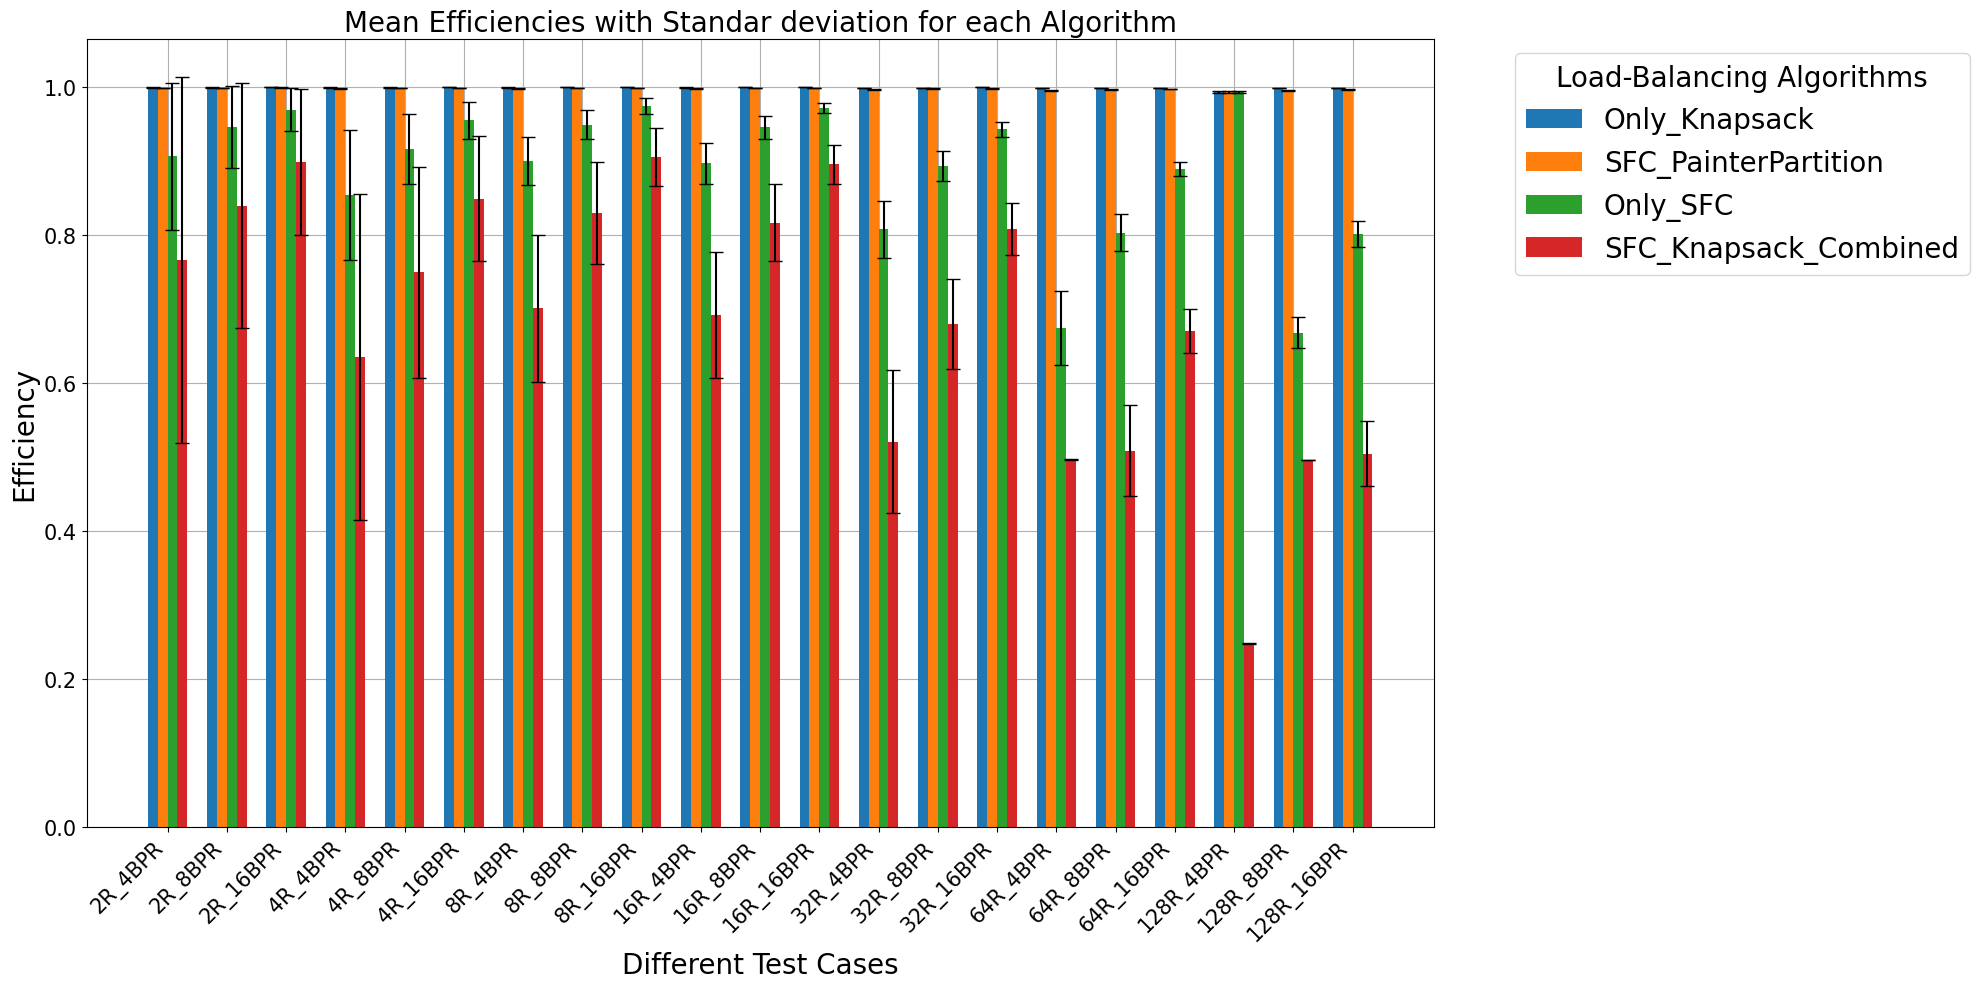

In [28]:
algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Only_SFC', 'SFC_Knapsack_Combined']
fig, ax = plt.subplots(figsize=(20, 10))
width = 1  
num_algorithms = len(algorithms)
group_gap = 2  
x_spacing = num_algorithms * width + group_gap
x = np.arange(len(grouped['File'])) * x_spacing

for i, alg in enumerate(algorithms):
    mean_col = f'{alg}_Efficiency_mean'
    std_col = f'{alg}_Efficiency_std'
    ax.bar(x + i * width, grouped[mean_col], width,
           yerr=grouped[std_col], capsize=5, label=alg)
    
ax.grid(True)
ax.set_axisbelow(True)
ax.set_xlabel('Different Test Cases', fontsize=20)
ax.set_ylabel('Efficiency', fontsize=20)
ax.set_title('Mean Efficiencies with Standar deviation for each Algorithm', fontsize=20)
ax.set_xticks(x + width * (num_algorithms - 1) / 2)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(title='Load-Balancing Algorithms', title_fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)

plt.margins(x=0.05)
plt.tight_layout()
plt.savefig('./result/efficiency_errorbarplot.png', dpi=600)
plt.show()

In [ ]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

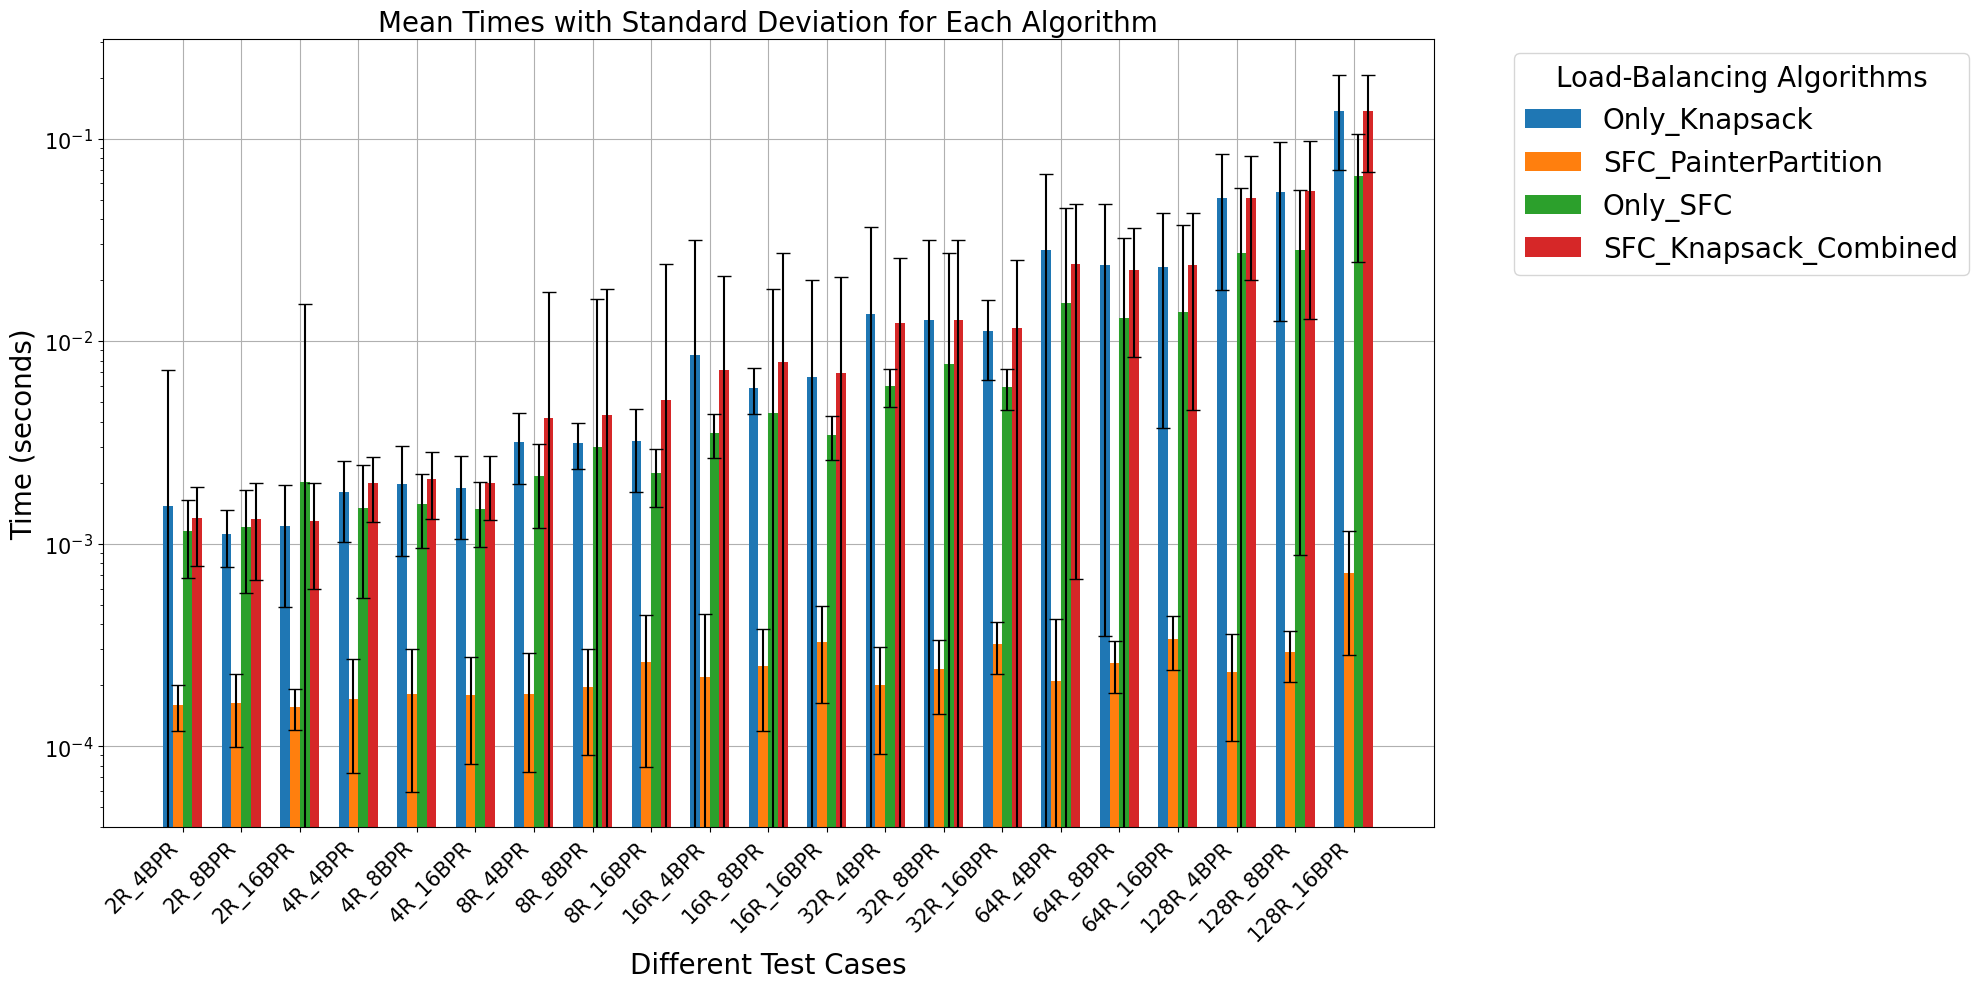

In [29]:

time = ['Only_Knapsack', 'SFC_PainterPartition', 'Only_SFC', 'SFC_Knapsack_Combined']
fig, ax = plt.subplots(figsize=(20, 10))
width = 1  
num_algorithms = len(time)
group_gap = 2  
x_spacing = num_algorithms * width + group_gap
x = np.arange(len(grouped['File'])) * x_spacing

for i, alg in enumerate(time):
    mean_col = f'{alg}_Final_Time_mean'
    std_col = f'{alg}_Final_Time_std'
    ax.bar(x + i * width, grouped[mean_col], width,
           yerr=grouped[std_col], capsize=5, label=alg)
ax.grid(True)
ax.set_axisbelow(True)
# Set y-axis to logarithmic scale
ax.set_yscale('log')

ax.set_xlabel('Different Test Cases', fontsize=20)
ax.set_ylabel('Time (seconds)', fontsize=20)
ax.set_title('Mean Times with Standard Deviation for Each Algorithm', fontsize=20)
ax.set_xticks(x + width*(len(time)-1)/2)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(title='Load-Balancing Algorithms', title_fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
plt.margins(x=0.05)
plt.tight_layout()
plt.savefig('./result/time_errorbarplot.png', dpi=600)
plt.show()

In [30]:
algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Only_SFC', 'SFC_Knapsack_Combined']

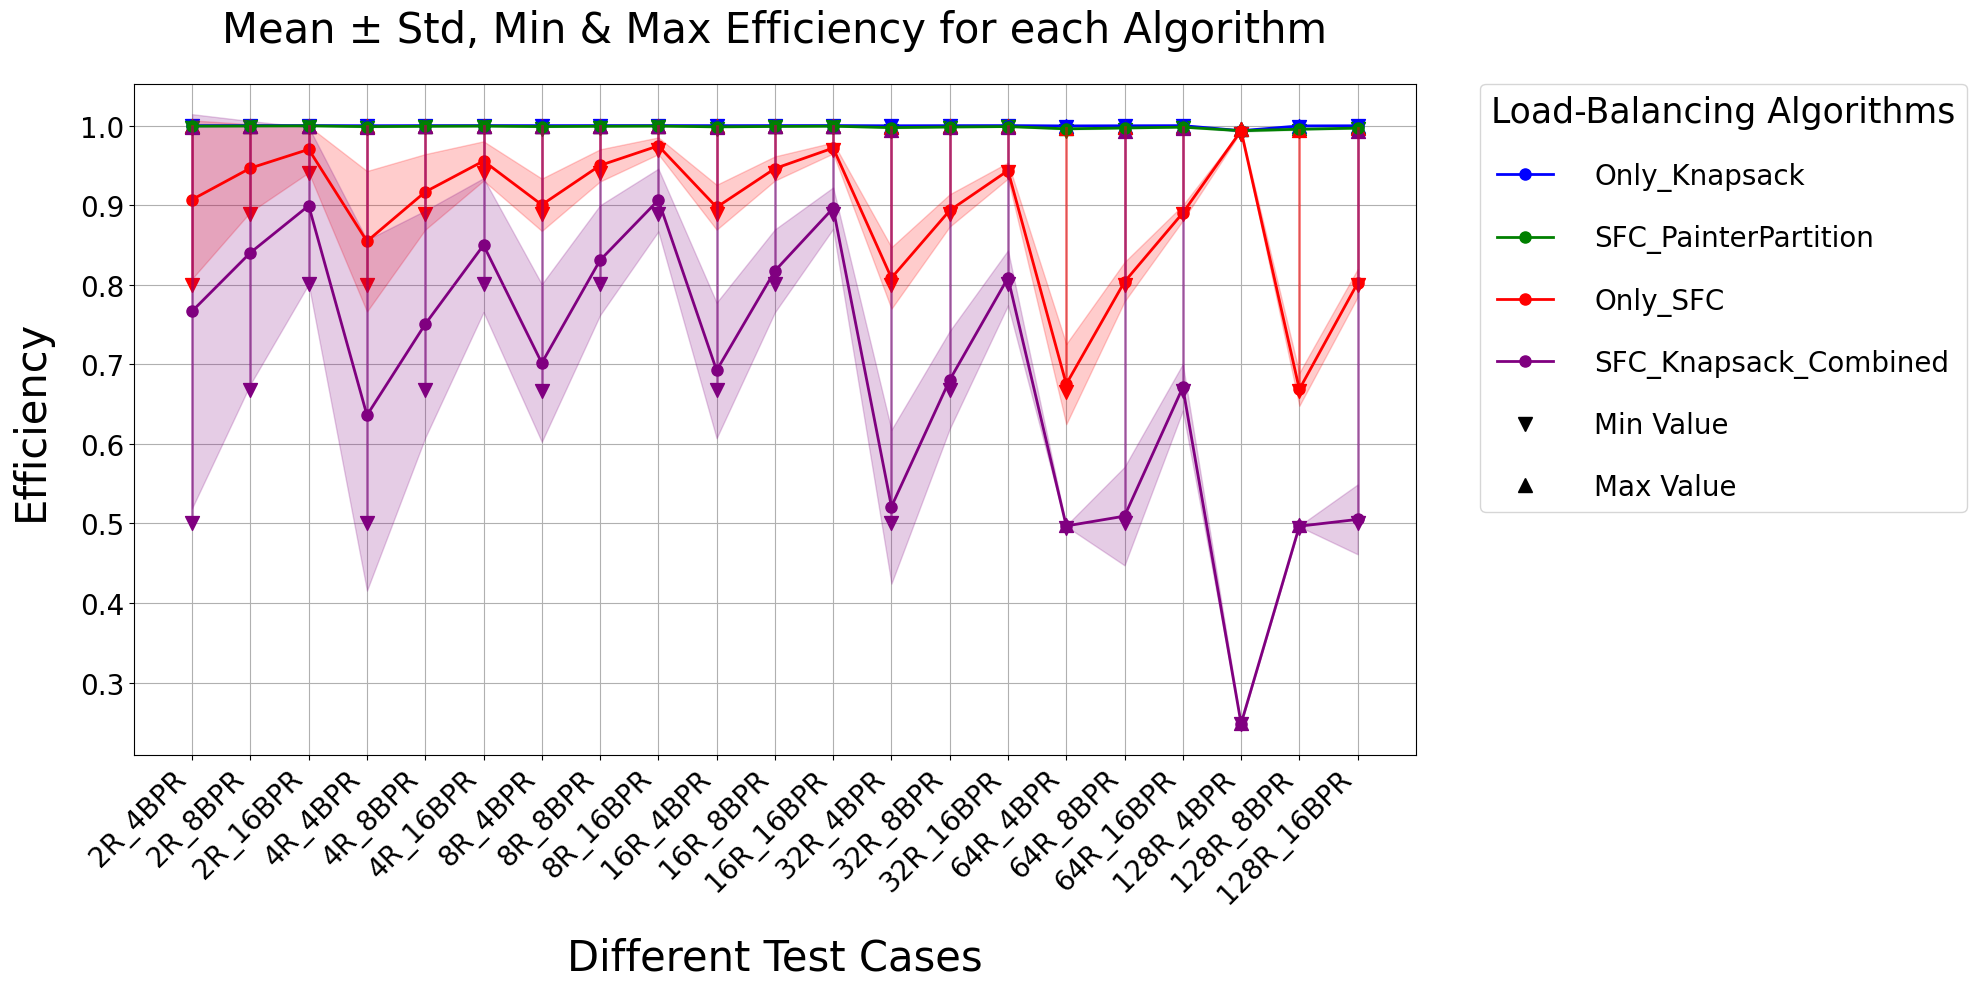

In [50]:


algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Only_SFC', 'SFC_Knapsack_Combined']
colors = ['blue', 'green', 'red', 'purple']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  


    mean_col = f'{alg_name}_Efficiency_mean'
    std_col = f'{alg_name}_Efficiency_std'
    min_col = f'{alg_name}_Efficiency_min'
    max_col = f'{alg_name}_Efficiency_max'

    alg_color = colors[i]
    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]
        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases',  fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30,labelpad=20)
ax.set_title('Mean ± Std, Min & Max Efficiency for each Algorithm', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

import matplotlib.lines as mlines
min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)
plt.tight_layout()
plt.savefig('./result/efficiency_all_stats.png', dpi=600)
plt.show()





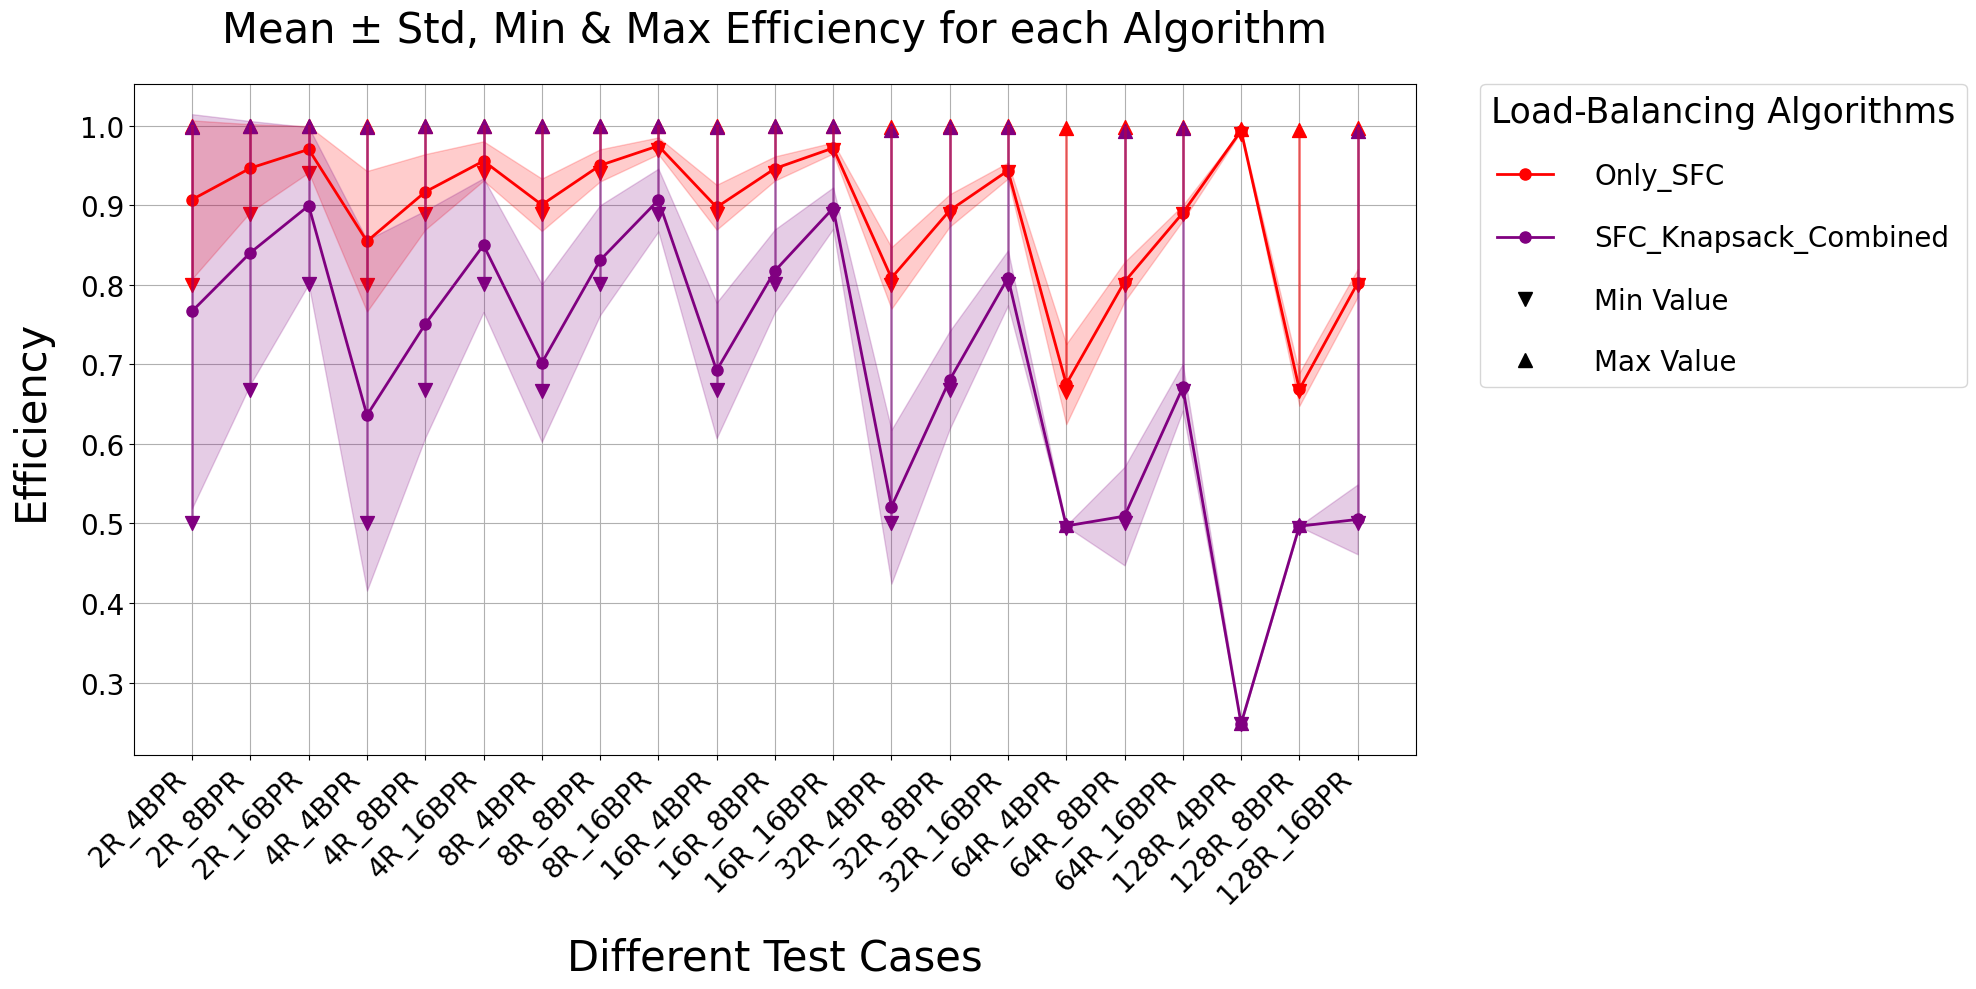

In [51]:


algorithms = ['Only_SFC', 'SFC_Knapsack_Combined']
colors = ['red', 'purple']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  


    mean_col = f'{alg_name}_Efficiency_mean'
    std_col = f'{alg_name}_Efficiency_std'
    min_col = f'{alg_name}_Efficiency_min'
    max_col = f'{alg_name}_Efficiency_max'

    alg_color = colors[i]
    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]
        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases',  fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30,labelpad=20)
ax.set_title('Mean ± Std, Min & Max Efficiency for each Algorithm', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

import matplotlib.lines as mlines
min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)
plt.tight_layout()
plt.savefig('./result/efficiency_all_stats_2.png', dpi=600)
plt.show()



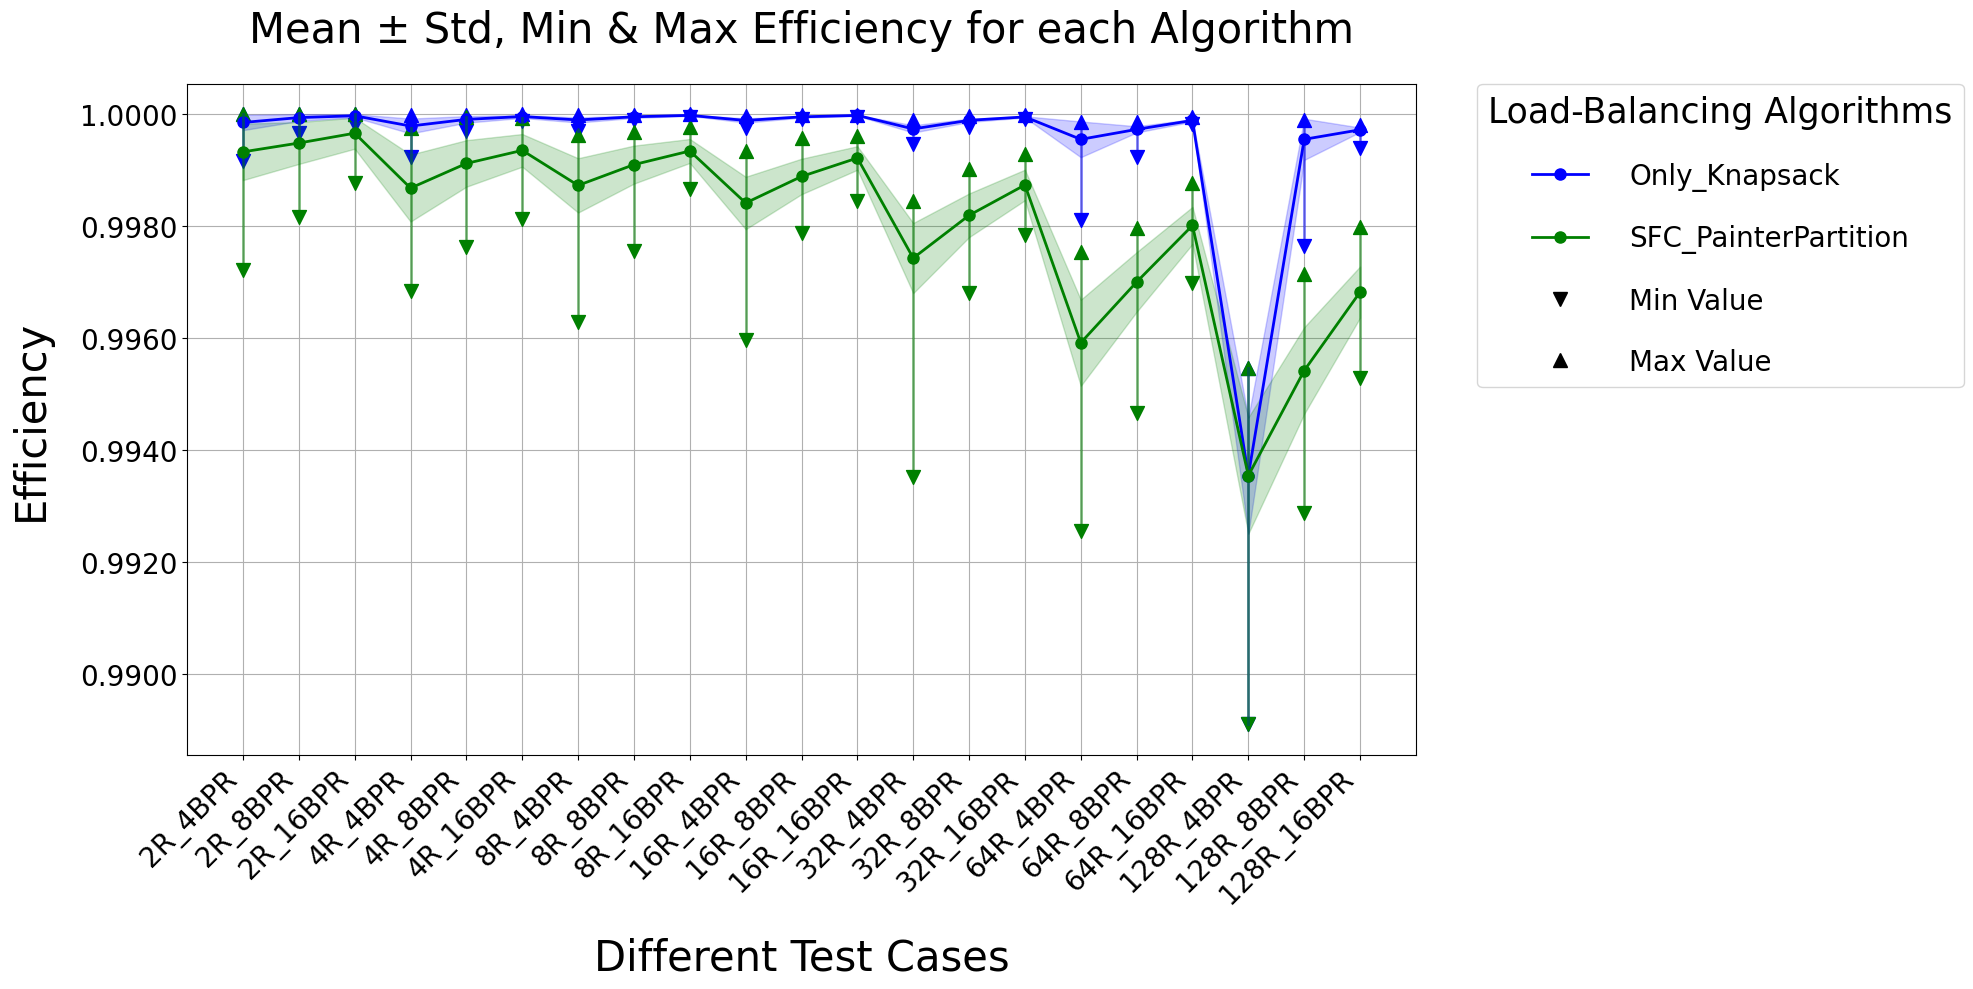

In [83]:
algorithms = ['Only_Knapsack', 'SFC_PainterPartition']
colors = ['blue', 'green']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  

    mean_col = f'{alg_name}_Efficiency_mean'
    std_col = f'{alg_name}_Efficiency_std'
    min_col = f'{alg_name}_Efficiency_min'
    max_col = f'{alg_name}_Efficiency_max'

    alg_color = colors[i]
    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]
        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30, labelpad=20)
ax.set_title('Mean ± Std, Min & Max Efficiency for each Algorithm', pad=30, fontsize=30)
# ax.set_ylim(0.990, 1.0005)

ax.tick_params(axis='both', which='major', labelsize=20)

ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.4f'))
min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')
handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20,
          bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('./result/efficiency_all_stats_3.png', dpi=600)
plt.show()


In [31]:
grouped

,File,Only_Knapsack_Efficiency_mean,Only_Knapsack_Efficiency_std,Only_Knapsack_Efficiency_min,Only_Knapsack_Efficiency_max,SFC_PainterPartition_Efficiency_mean,SFC_PainterPartition_Efficiency_std,SFC_PainterPartition_Efficiency_min,SFC_PainterPartition_Efficiency_max,Only_SFC_Efficiency_mean,Only_SFC_Efficiency_std,Only_SFC_Efficiency_min,Only_SFC_Efficiency_max,SFC_Knapsack_Combined_Efficiency_mean,SFC_Knapsack_Combined_Efficiency_std,SFC_Knapsack_Combined_Efficiency_min,SFC_Knapsack_Combined_Efficiency_max,Only_Knapsack_Final_Time_mean,Only_Knapsack_Final_Time_std,Only_Knapsack_Final_Time_min,Only_Knapsack_Final_Time_max,SFC_PainterPartition_Final_Time_mean,SFC_PainterPartition_Final_Time_std,SFC_PainterPartition_Final_Time_min,SFC_PainterPartition_Final_Time_max,Only_SFC_Final_Time_mean,Only_SFC_Final_Time_std,Only_SFC_Final_Time_min,Only_SFC_Final_Time_max,SFC_Knapsack_Combined_Final_Time_mean,SFC_Knapsack_Combined_Final_Time_std,SFC_Knapsack_Combined_Final_Time_min,SFC_Knapsack_Combined_Final_Time_max
0,2R_4BPR,0.999852,0.000137,0.999167,0.999999,0.999327,0.000505,0.997217,0.999997,0.907027,0.099461,0.799466,0.999992,0.766775,0.247528,0.500360,0.998737,0.001526,0.005634,0.000890,0.089865,0.000160,0.000040,0.000119,0.000373,0.001155,0.000480,0.000891,0.005604,0.001343,0.000571,0.001049,0.006073
1,2R_8BPR,0.999939,0.000061,0.999668,0.999999,0.999485,0.000374,0.998156,1.000000,0.946563,0.055185,0.888402,1.000000,0.840269,0.165362,0.667430,0.999797,0.001112,0.000349,0.000882,0.005062,0.000163,0.000063,0.000124,0.000547,0.001204,0.000635,0.000898,0.007223,0.001322,0.000660,0.001001,0.009872
2,2R_16BPR,0.999972,0.000028,0.999801,1.000000,0.999660,0.000278,0.998770,1.000000,0.970081,0.029160,0.940948,0.999993,0.899332,0.098703,0.801146,0.999915,0.001219,0.000731,0.000892,0.006575,0.000156,0.000036,0.000125,0.000436,0.002007,0.013321,0.000888,0.211577,0.001294,0.000701,0.001014,0.009299
3,4R_4BPR,0.999789,0.000133,0.999228,0.999981,0.998680,0.000598,0.996845,0.999747,0.854552,0.088305,0.799042,0.999684,0.635921,0.220382,0.500362,0.998227,0.001789,0.000775,0.001398,0.009489,0.000171,0.000097,0.000121,0.001074,0.001495,0.000954,0.001152,0.013205,0.001983,0.000702,0.001551,0.008502
4,4R_8BPR,0.999907,0.000059,0.999703,0.999992,0.999120,0.000416,0.997634,0.999948,0.916648,0.047432,0.888504,0.999948,0.750431,0.142702,0.667220,0.999316,0.001960,0.001088,0.001454,0.014380,0.000181,0.000121,0.000129,0.001582,0.001572,0.000625,0.001185,0.006055,0.002079,0.000759,0.001586,0.007329
5,4R_16BPR,0.999958,0.000025,0.999872,0.999996,0.999354,0.000292,0.998135,0.999938,0.955475,0.024717,0.940961,0.999938,0.849721,0.084144,0.801259,0.999599,0.001880,0.000822,0.001437,0.011391,0.000179,0.000098,0.000134,0.001214,0.001485,0.000524,0.001188,0.005919,0.002002,0.000697,0.001612,0.010182
6,8R_4BPR,0.999897,0.000046,0.999705,0.999977,0.998728,0.000485,0.996295,0.999629,0.900433,0.032890,0.888569,0.999629,0.701558,0.099085,0.667017,0.998916,0.003185,0.001210,0.002464,0.014154,0.000181,0.000107,0.000129,0.001295,0.002150,0.000954,0.001657,0.013819,0.004176,0.013268,0.002630,0.212624
7,8R_8BPR,0.999953,0.000020,0.999888,0.999992,0.999099,0.000340,0.997548,0.999681,0.949914,0.020192,0.940896,0.999497,0.830768,0.069040,0.801412,0.999301,0.003142,0.000817,0.002477,0.008136,0.000197,0.000107,0.000148,0.001270,0.002988,0.013061,0.001666,0.208446,0.004331,0.013847,0.002719,0.221769
8,8R_16BPR,0.999979,0.000008,0.999953,0.999995,0.999343,0.000214,0.998664,0.999766,0.974532,0.010545,0.969564,0.999678,0.906342,0.039428,0.889182,0.999631,0.003213,0.001422,0.002493,0.023306,0.000262,0.000183,0.000188,0.001655,0.002225,0.000707,0.001737,0.006315,0.005109,0.018887,0.002707,0.216318
9,16R_4BPR,0.999888,0.000038,0.999758,0.999976,0.998413,0.000469,0.995966,0.999345,0.897341,0.028195,0.888504,0.999023,0.692278,0.085248,0.667070,0.998457,0.008492,0.023107,0.004635,0.218319,0.000218,0.000232,0.000147,0.003522,0.003517,0.000862,0.002749,0.009944,0.007210,0.013774,0.004869,0.2

/tmp/ipykernel_1128301/2345676559.py:40: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(1e-6, 0)


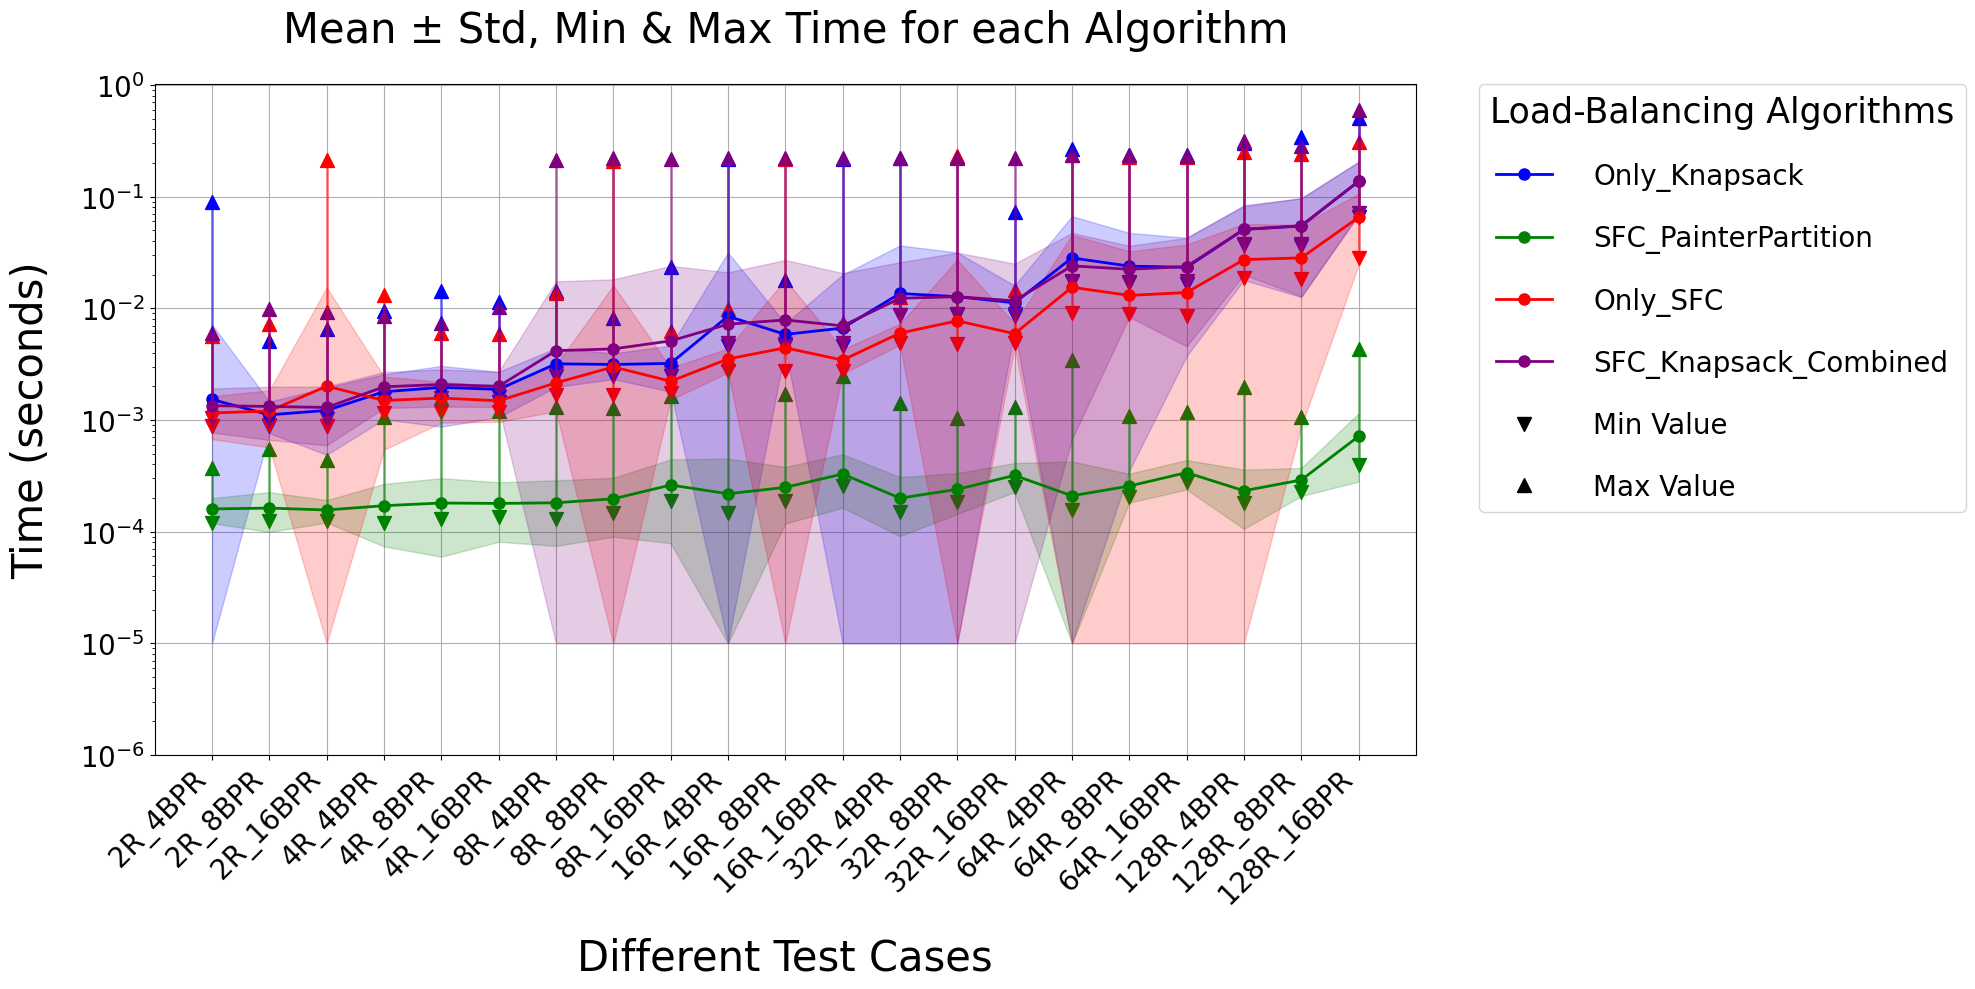

In [90]:

time = ['Only_Knapsack', 'SFC_PainterPartition', 'Only_SFC', 'SFC_Knapsack_Combined']
colors = ['blue', 'green', 'red', 'purple']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(time):
    alg_name = alg  

    mean_col = f'{alg_name}_Final_Time_mean'
    std_col = f'{alg_name}_Final_Time_std'
    min_col = f'{alg_name}_Final_Time_min'
    max_col = f'{alg_name}_Final_Time_max'

    alg_color = colors[i]
    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    lower_bound = np.maximum(grouped[mean_col] - grouped[std_col], 1e-5) 
    upper_bound = grouped[mean_col] + grouped[std_col]

    ax.fill_between(
        x,
        lower_bound,
        upper_bound,
        color=alg_color,
        alpha=0.2
    )
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]
        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
ax.set_ylabel('Time (seconds)', fontsize=30, labelpad=20)
ax.set_title('Mean ± Std, Min & Max Time for each Algorithm', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_yscale('log')
ax.set_ylim(1e-6, 0)  

min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20,
          bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('./result/time_all_stats.png', dpi=600)
plt.show()




/tmp/ipykernel_1128301/2245397818.py:35: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(1e-5, 0)


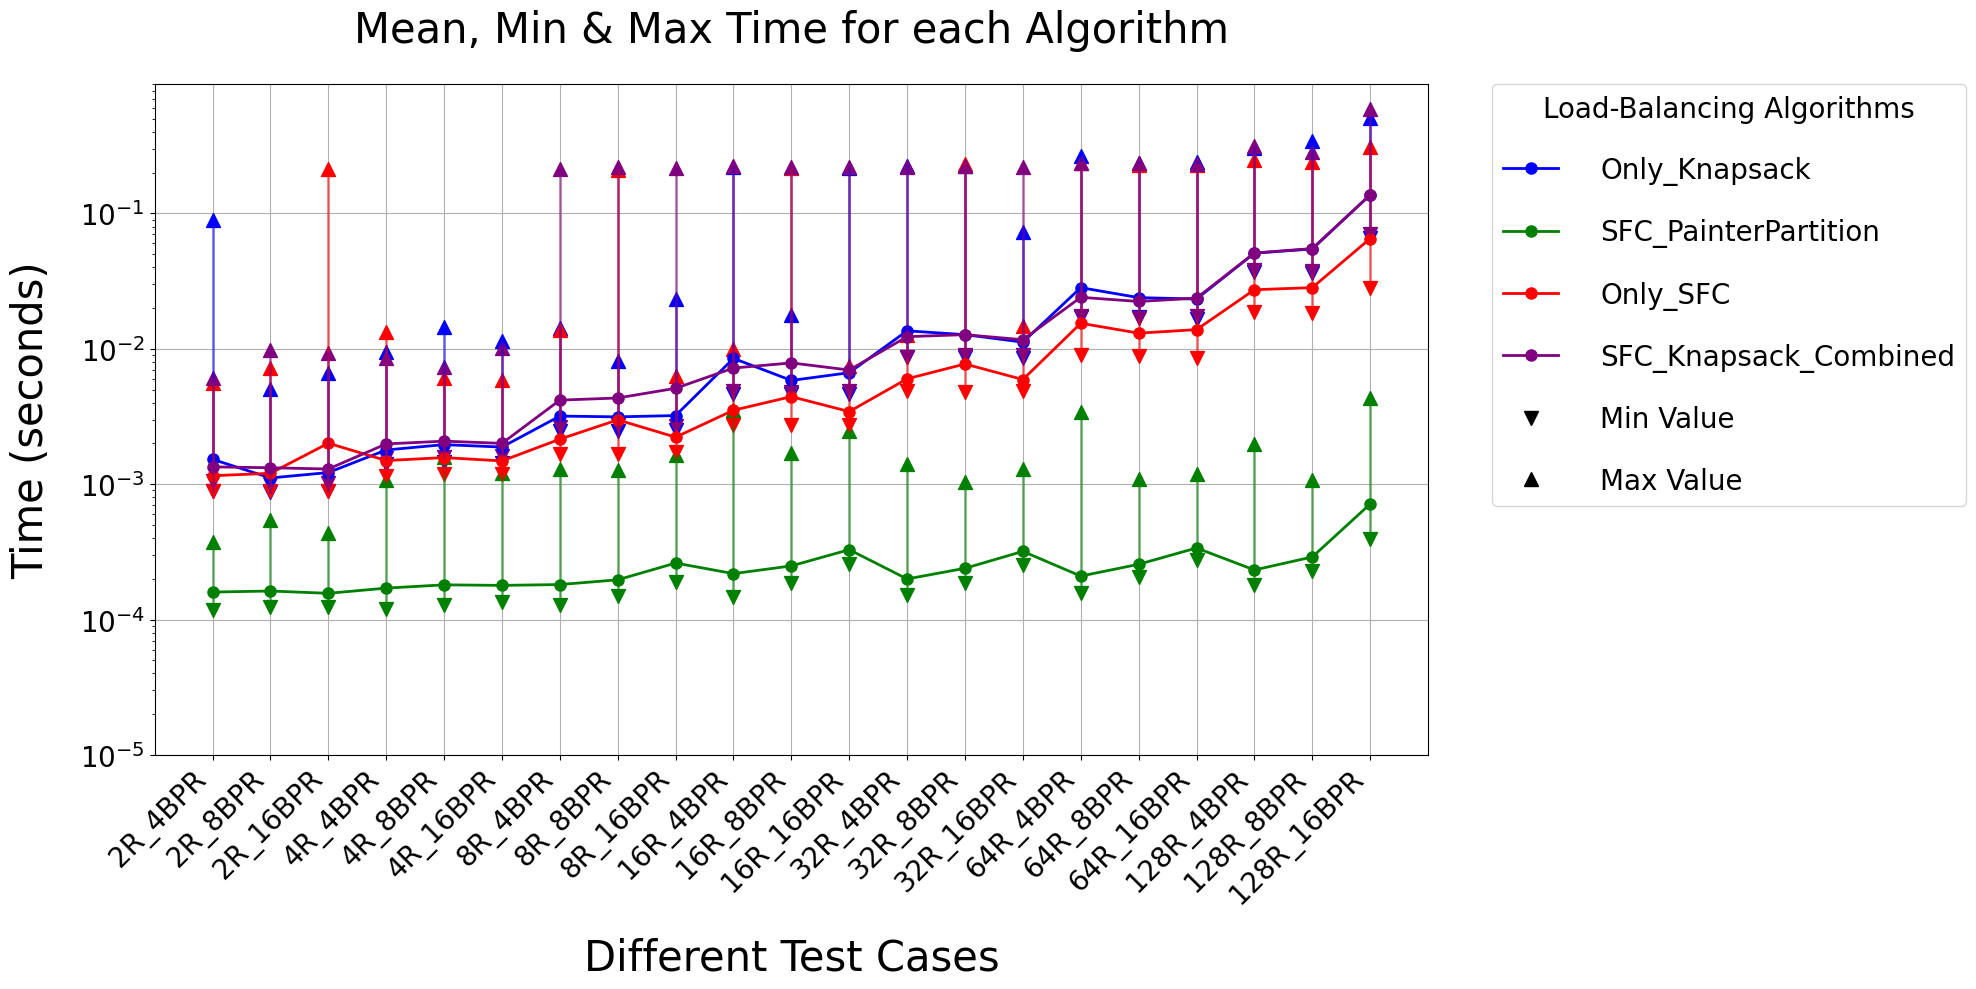

In [94]:
time = ['Only_Knapsack', 'SFC_PainterPartition', 'Only_SFC', 'SFC_Knapsack_Combined']
colors = ['blue', 'green', 'red', 'purple']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(time):
    alg_name = alg  

    mean_col = f'{alg_name}_Final_Time_mean'
    min_col = f'{alg_name}_Final_Time_min'
    max_col = f'{alg_name}_Final_Time_max'

    alg_color = colors[i]

    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]

        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)

        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)

        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)


ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases', fontsize=30,labelpad=20)
ax.set_ylabel('Time (seconds)', fontsize=30,  labelpad=20)
ax.set_title('Mean, Min & Max Time for each Algorithm', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.set_yscale('log')
ax.set_ylim(1e-5, 0)  


min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=20, fontsize=20,
          bbox_to_anchor=(1.05, 1), loc='upper left',  borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('./result/time_all_stats_2.png', dpi=600)
plt.show()




In [95]:
grouped

,File,Only_Knapsack_Efficiency_mean,Only_Knapsack_Efficiency_std,Only_Knapsack_Efficiency_min,Only_Knapsack_Efficiency_max,SFC_PainterPartition_Efficiency_mean,SFC_PainterPartition_Efficiency_std,SFC_PainterPartition_Efficiency_min,SFC_PainterPartition_Efficiency_max,Only_SFC_Efficiency_mean,Only_SFC_Efficiency_std,Only_SFC_Efficiency_min,Only_SFC_Efficiency_max,SFC_Knapsack_Combined_Efficiency_mean,SFC_Knapsack_Combined_Efficiency_std,SFC_Knapsack_Combined_Efficiency_min,SFC_Knapsack_Combined_Efficiency_max,Only_Knapsack_Final_Time_mean,Only_Knapsack_Final_Time_std,Only_Knapsack_Final_Time_min,Only_Knapsack_Final_Time_max,SFC_PainterPartition_Final_Time_mean,SFC_PainterPartition_Final_Time_std,SFC_PainterPartition_Final_Time_min,SFC_PainterPartition_Final_Time_max,Only_SFC_Final_Time_mean,Only_SFC_Final_Time_std,Only_SFC_Final_Time_min,Only_SFC_Final_Time_max,SFC_Knapsack_Combined_Final_Time_mean,SFC_Knapsack_Combined_Final_Time_std,SFC_Knapsack_Combined_Final_Time_min,SFC_Knapsack_Combined_Final_Time_max
0,2R_4BPR,0.999852,0.000137,0.999167,0.999999,0.999327,0.000505,0.997217,0.999997,0.907027,0.099461,0.799466,0.999992,0.766775,0.247528,0.500360,0.998737,0.001526,0.005634,0.000890,0.089865,0.000160,0.000040,0.000119,0.000373,0.001155,0.000480,0.000891,0.005604,0.001343,0.000571,0.001049,0.006073
1,2R_8BPR,0.999939,0.000061,0.999668,0.999999,0.999485,0.000374,0.998156,1.000000,0.946563,0.055185,0.888402,1.000000,0.840269,0.165362,0.667430,0.999797,0.001112,0.000349,0.000882,0.005062,0.000163,0.000063,0.000124,0.000547,0.001204,0.000635,0.000898,0.007223,0.001322,0.000660,0.001001,0.009872
2,2R_16BPR,0.999972,0.000028,0.999801,1.000000,0.999660,0.000278,0.998770,1.000000,0.970081,0.029160,0.940948,0.999993,0.899332,0.098703,0.801146,0.999915,0.001219,0.000731,0.000892,0.006575,0.000156,0.000036,0.000125,0.000436,0.002007,0.013321,0.000888,0.211577,0.001294,0.000701,0.001014,0.009299
3,4R_4BPR,0.999789,0.000133,0.999228,0.999981,0.998680,0.000598,0.996845,0.999747,0.854552,0.088305,0.799042,0.999684,0.635921,0.220382,0.500362,0.998227,0.001789,0.000775,0.001398,0.009489,0.000171,0.000097,0.000121,0.001074,0.001495,0.000954,0.001152,0.013205,0.001983,0.000702,0.001551,0.008502
4,4R_8BPR,0.999907,0.000059,0.999703,0.999992,0.999120,0.000416,0.997634,0.999948,0.916648,0.047432,0.888504,0.999948,0.750431,0.142702,0.667220,0.999316,0.001960,0.001088,0.001454,0.014380,0.000181,0.000121,0.000129,0.001582,0.001572,0.000625,0.001185,0.006055,0.002079,0.000759,0.001586,0.007329
5,4R_16BPR,0.999958,0.000025,0.999872,0.999996,0.999354,0.000292,0.998135,0.999938,0.955475,0.024717,0.940961,0.999938,0.849721,0.084144,0.801259,0.999599,0.001880,0.000822,0.001437,0.011391,0.000179,0.000098,0.000134,0.001214,0.001485,0.000524,0.001188,0.005919,0.002002,0.000697,0.001612,0.010182
6,8R_4BPR,0.999897,0.000046,0.999705,0.999977,0.998728,0.000485,0.996295,0.999629,0.900433,0.032890,0.888569,0.999629,0.701558,0.099085,0.667017,0.998916,0.003185,0.001210,0.002464,0.014154,0.000181,0.000107,0.000129,0.001295,0.002150,0.000954,0.001657,0.013819,0.004176,0.013268,0.002630,0.212624
7,8R_8BPR,0.999953,0.000020,0.999888,0.999992,0.999099,0.000340,0.997548,0.999681,0.949914,0.020192,0.940896,0.999497,0.830768,0.069040,0.801412,0.999301,0.003142,0.000817,0.002477,0.008136,0.000197,0.000107,0.000148,0.001270,0.002988,0.013061,0.001666,0.208446,0.004331,0.013847,0.002719,0.221769
8,8R_16BPR,0.999979,0.000008,0.999953,0.999995,0.999343,0.000214,0.998664,0.999766,0.974532,0.010545,0.969564,0.999678,0.906342,0.039428,0.889182,0.999631,0.003213,0.001422,0.002493,0.023306,0.000262,0.000183,0.000188,0.001655,0.002225,0.000707,0.001737,0.006315,0.005109,0.018887,0.002707,0.216318
9,16R_4BPR,0.999888,0.000038,0.999758,0.999976,0.998413,0.000469,0.995966,0.999345,0.897341,0.028195,0.888504,0.999023,0.692278,0.085248,0.667070,0.998457,0.008492,0.023107,0.004635,0.218319,0.000218,0.000232,0.000147,0.003522,0.003517,0.000862,0.002749,0.009944,0.007210,0.013774,0.004869,0.2

In [96]:
columns_to_keep = ['File','Only_Knapsack_Efficiency_mean', 'Only_SFC_Efficiency_mean', 'SFC_PainterPartition_Efficiency_mean', 'SFC_Knapsack_Combined_Efficiency_mean', 'Only_Knapsack_Final_Time_mean', 'Only_SFC_Final_Time_mean', 'SFC_PainterPartition_Final_Time_mean', 'SFC_Knapsack_Combined_Final_Time_mean' ]
new_df = grouped[columns_to_keep]


In [97]:
new_df

,File,Only_Knapsack_Efficiency_mean,Only_SFC_Efficiency_mean,SFC_PainterPartition_Efficiency_mean,SFC_Knapsack_Combined_Efficiency_mean,Only_Knapsack_Final_Time_mean,Only_SFC_Final_Time_mean,SFC_PainterPartition_Final_Time_mean,SFC_Knapsack_Combined_Final_Time_mean
0,2R_4BPR,0.999852,0.907027,0.999327,0.766775,0.001526,0.001155,0.000160,0.001343
1,2R_8BPR,0.999939,0.946563,0.999485,0.840269,0.001112,0.001204,0.000163,0.001322
2,2R_16BPR,0.999972,0.970081,0.999660,0.899332,0.001219,0.002007,0.000156,0.001294
3,4R_4BPR,0.999789,0.854552,0.998680,0.635921,0.001789,0.001495,0.000171,0.001983
4,4R_8BPR,0.999907,0.916648,0.999120,0.750431,0.001960,0.001572,0.000181,0.002079
5,4R_16BPR,0.999958,0.955475,0.999354,0.849721,0.001880,0.001485,0.000179,0.002002
6,8R_4BPR,0.999897,0.900433,0.998728,0.701558,0.003185,0.002150,0.000181,0.004176
7,8R_8BPR,0.999953,0.949914,0.999099,0.830768,0.003142,0.002988,0.000197,0.004331
8,8R_16BPR,0.999979,0.974532,0.999343,0.906342,0.003213,0.002225,0.000262,0.005109
9,16R_4BPR,0.999888,0.897341,0.998413,0.692278,0.008492,0.003517,0.000218,0.007210


In [ ]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

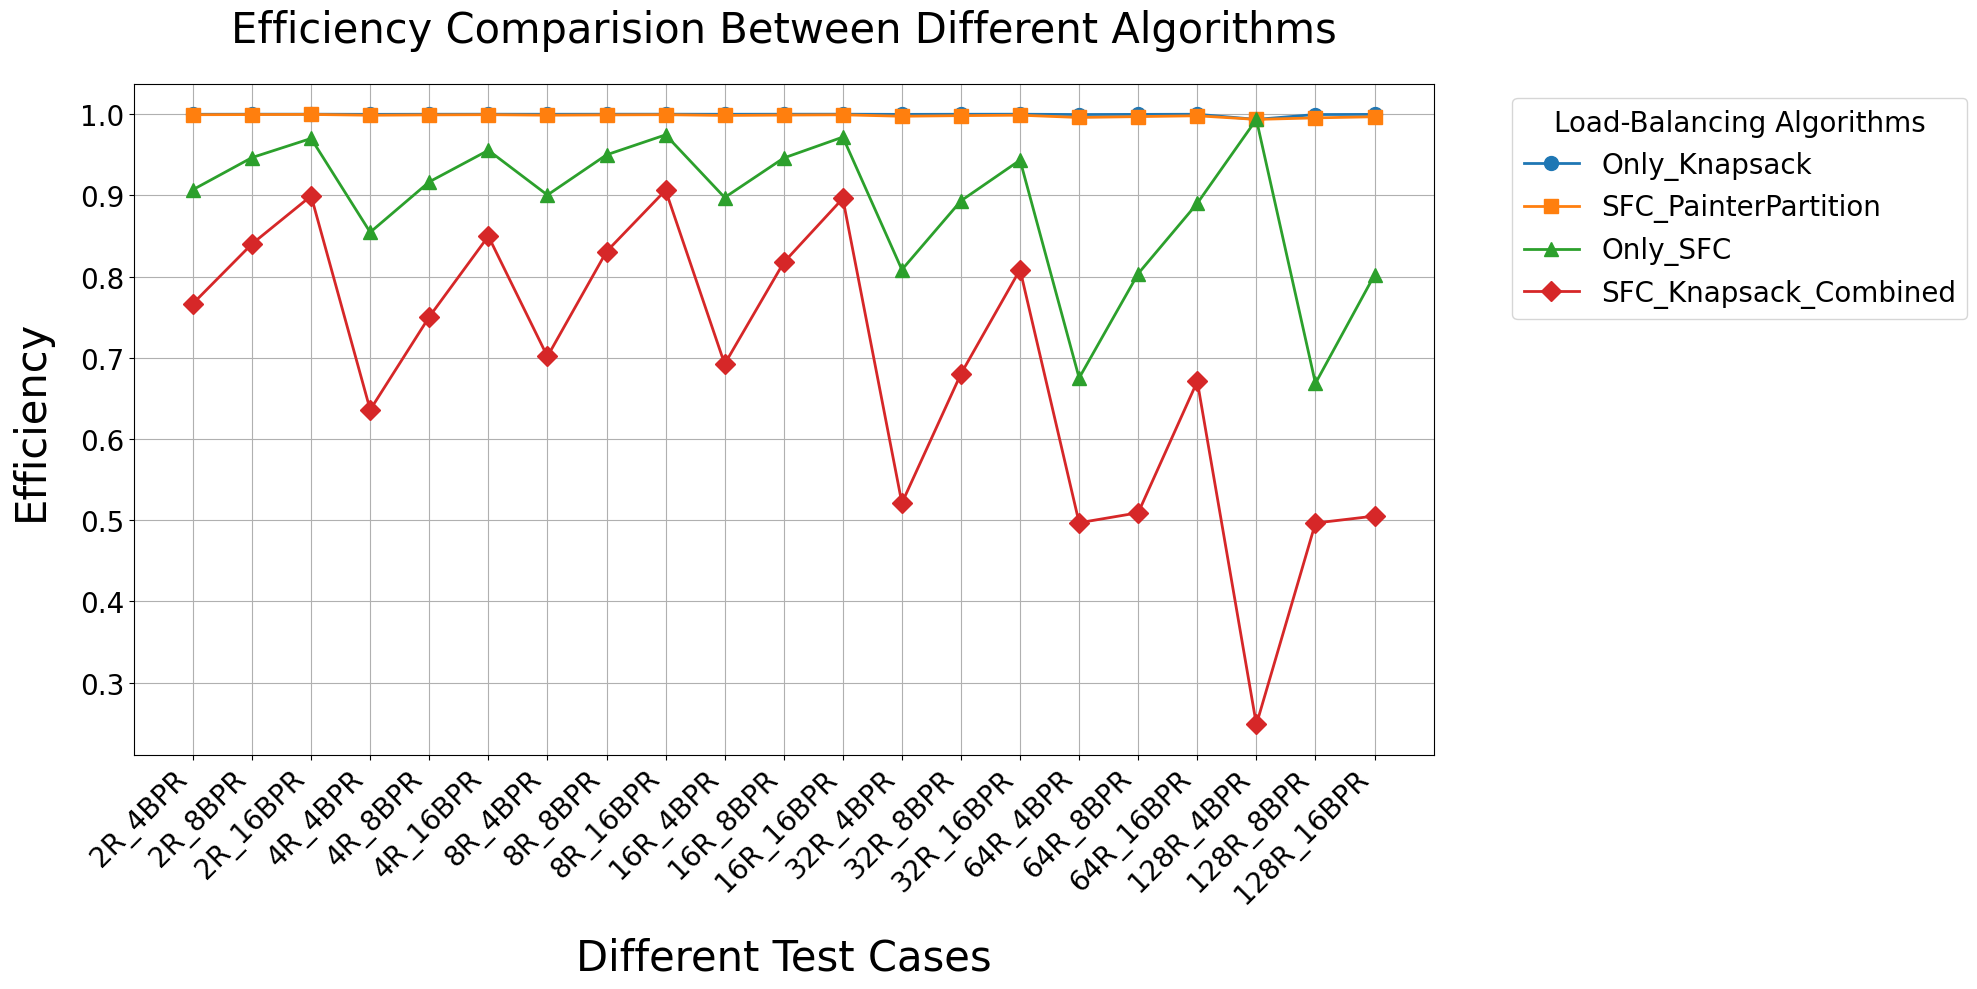

In [101]:
algorithms = [
    ('Only_Knapsack', 'Only_Knapsack_Efficiency_mean', 'Only_Knapsack_Final_Time_mean', 'o'),
    ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency_mean', 'SFC_PainterPartition_Final_Time_mean', 's'),
    ('Only_SFC', 'Only_SFC_Efficiency_mean', 'Only_SFC_Final_Time_mean', '^'),
    ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency_mean', 'SFC_Knapsack_Combined_Final_Time_mean', 'D')
]

x = np.arange(len(new_df['File']))
fig, ax = plt.subplots(figsize=(20, 10))

for alg_name, eff_col, time_col, marker in algorithms:
    ax.plot(x, new_df[eff_col], marker=marker, markersize=10, linewidth=2, label=alg_name)
ax.set_xticks(x)
ax.set_xticklabels(new_df['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases', fontsize=30,labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30,  labelpad=20)
ax.set_title('Efficiency Comparision Between Different Algorithms', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(title='Load-Balancing Algorithms', title_fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
ax.grid(True)
ax.set_axisbelow(True)
plt.tight_layout()
plt.savefig('./result/efficiency.png', dpi=600)
plt.show()





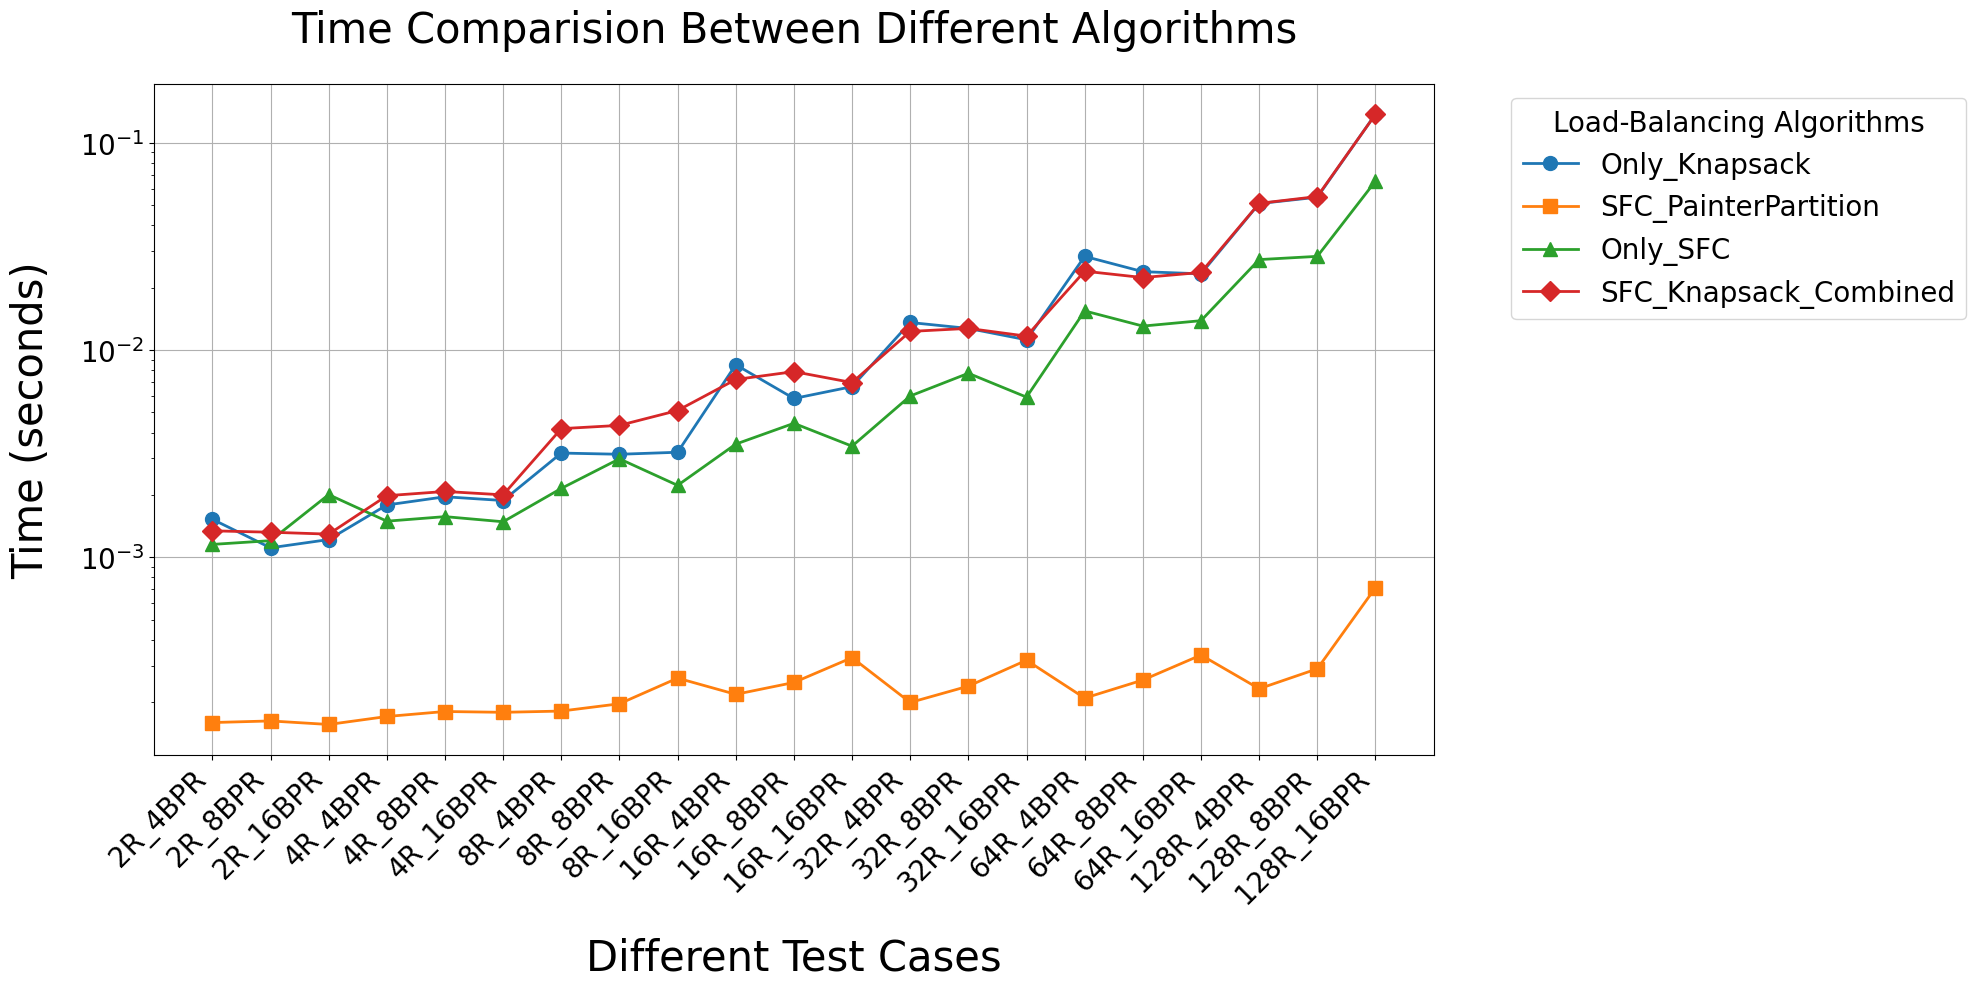

In [102]:
# fig, ax = plt.subplots(figsize=(20, 10))

# for alg_name, eff_col, time_col, marker in algorithms:
#     ax.plot(x, new_df[time_col], marker=marker, markersize=10, linewidth=2, label=alg_name)
# ax.set_xticks(x)
# ax.set_xticklabels(new_df['File'], rotation=45, ha='right')
# ax.set_xlabel('File', fontsize=15)
# ax.set_ylabel('Time (seconds)', fontsize=15)
# ax.set_title('Time Means by File and Algorithm', fontsize=20)
# ax.tick_params(axis='both', which='major', labelsize=15)
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)

# plt.tight_layout()
# plt.show()


x = np.arange(len(new_df['File']))
fig, ax = plt.subplots(figsize=(20, 10))

for alg_name, eff_col, time_col, marker in algorithms:
    ax.plot(x, new_df[time_col], marker=marker, markersize=10, linewidth=2, label=alg_name)
ax.set_xticks(x)
ax.set_xticklabels(new_df['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases', fontsize=30,labelpad=20)
ax.set_ylabel('Time (seconds)',  fontsize=30,  labelpad=20)
ax.set_title('Time Comparision Between Different Algorithms', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(title='Load-Balancing Algorithms', title_fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
ax.grid(True)
ax.set_axisbelow(True)
ax.set_yscale('log')
plt.tight_layout()
plt.savefig('./result/time.png', dpi=600)
plt.show()




In [103]:
result_df

,Run,Only_Knapsack_Efficiency,Only_Knapsack_Final_Time,Only_SFC_Efficiency,Only_SFC_Final_Time,SFC_PainterPartition_Efficiency,SFC_PainterPartition_Final_Time,SFC_Knapsack_Combined_Efficiency,SFC_Knapsack_Combined_Final_Time,File
0,1,0.999949,0.001086,0.999501,0.001043,0.999501,0.000151,0.997411,0.001537,2_4_Output_Best
1,2,0.999967,0.000940,0.998913,0.001007,0.998913,0.000152,0.996170,0.001623,2_4_Output_Best
2,3,0.999754,0.000986,0.999898,0.000978,0.999898,0.000128,0.998090,0.001072,2_4_Output_Best
3,4,0.999884,0.000947,0.800066,0.000971,0.999628,0.000135,0.500839,0.001084,2_4_Output_Best
4,5,0.999498,0.001736,0.999172,0.004681,0.999172,0.000373,0.996389,0.001234,2_4_Output_Best
...,...,...,...,...,...,...,...,...,...,...
5245,246,0.999728,0.158294,0.800521,0.078736,0.997579,0.000518,0.500778,0.085531,128_16_Output_Best
5246,247,0.999748,0.140289,0.800197,0.274997,0.996466,0.000520,0.501243,0.093452,128_16_Output_Best
5247,248,0.999730,0.091661,0.799967,0.044501,0.997053,0.000550,0.500814,0.123708,128_16_Output_Best
5248,249,0.999694,0.094900,0.800280,0.056576,0.996118,0.000483,0.500723,0.081335,128_16_Output_Best


In [ ]:
alg_cols = [
    'Only_Knapsack_Efficiency', 
    'SFC_PainterPartition_Efficiency',
    'Only_SFC_Efficiency',
    'SFC_Knapsack_Combined_Efficiency'
]

# Melt the data into long format
df_long = result_df.melt(
    id_vars=['Run', 'File'],  # or whichever ID columns you have
    value_vars=alg_cols,
    var_name='Algorithm',
    value_name='Efficiency'
)

# Clean the Algorithm names if needed
df_long['Algorithm'] = df_long['Algorithm'].str.replace('_Efficiency', '', regex=False)

In [105]:
df_long

,Run,File,Algorithm,Efficiency
0,1,2_4_Output_Best,Only_Knapsack,0.999949
1,2,2_4_Output_Best,Only_Knapsack,0.999967
2,3,2_4_Output_Best,Only_Knapsack,0.999754
3,4,2_4_Output_Best,Only_Knapsack,0.999884
4,5,2_4_Output_Best,Only_Knapsack,0.999498
...,...,...,...,...
20995,246,128_16_Output_Best,SFC_Knapsack_Combined,0.500778
20996,247,128_16_Output_Best,SFC_Knapsack_Combined,0.501243
20997,248,128_16_Output_Best,SFC_Knapsack_Combined,0.500814
20998,249,128_16_Output_Best,SFC_Knapsack_Combined,0.500723


In [108]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df_long['Algorithm'] = df_long['Algorithm'].astype('category')
model = ols('Efficiency ~ C(Algorithm)', data=df_long).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                  sum_sq       df            F  PR(>F)
C(Algorithm)  330.600713      3.0  8972.782306     0.0
Residual      257.864741  20996.0          NaN     NaN


In [109]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df_long['Efficiency'],
                          groups=df_long['Algorithm'],
                          alpha=0.05)
print(tukey)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05               
        group1                group2        meandiff p-adj  lower   upper  reject
---------------------------------------------------------------------------------
        Only_Knapsack              Only_SFC  -0.1106   0.0 -0.1161  -0.105   True
        Only_Knapsack SFC_Knapsack_Combined   -0.308   0.0 -0.3135 -0.3024   True
        Only_Knapsack  SFC_PainterPartition  -0.0014  0.91  -0.007  0.0041  False
             Only_SFC SFC_Knapsack_Combined  -0.1974   0.0 -0.2029 -0.1918   True
             Only_SFC  SFC_PainterPartition   0.1091   0.0  0.1036  0.1147   True
SFC_Knapsack_Combined  SFC_PainterPartition   0.3065   0.0   0.301  0.3121   True
---------------------------------------------------------------------------------


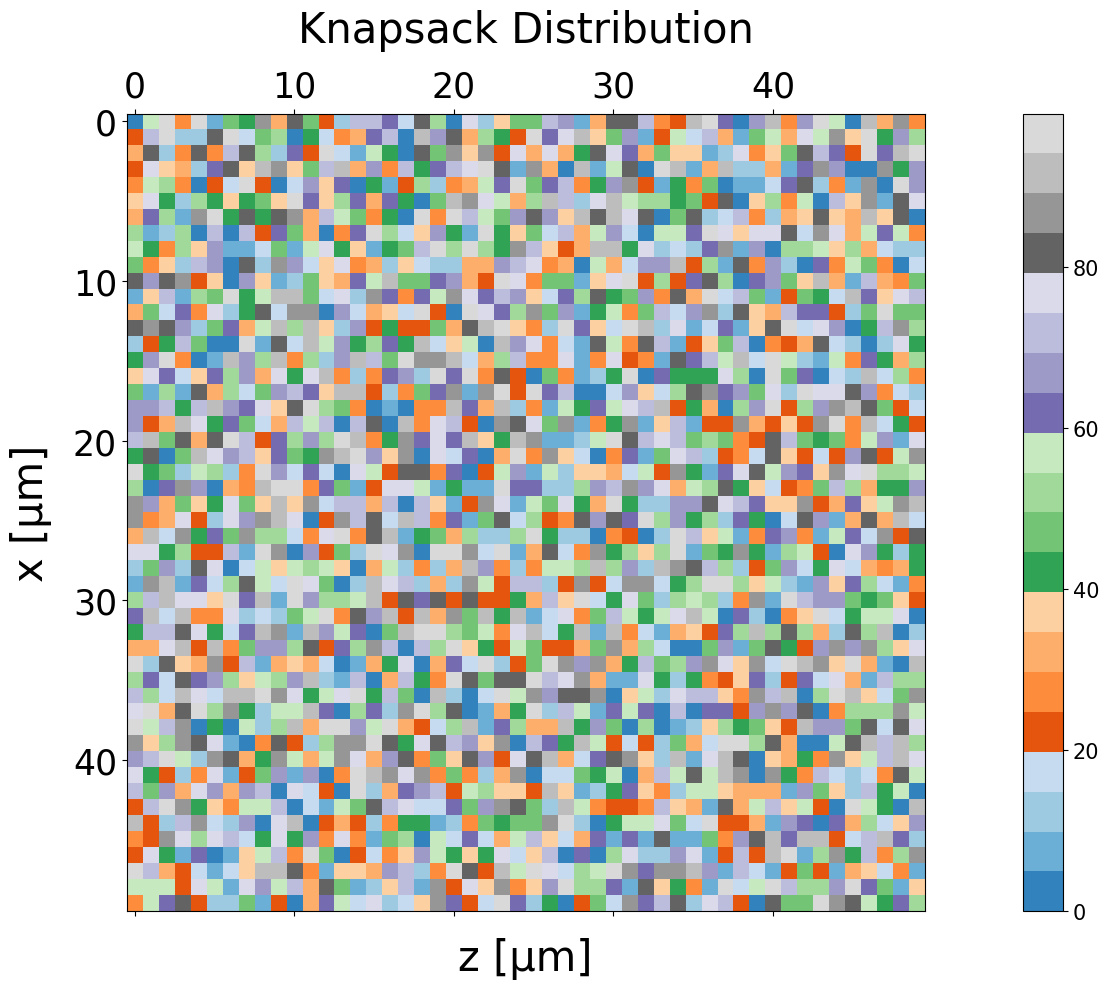

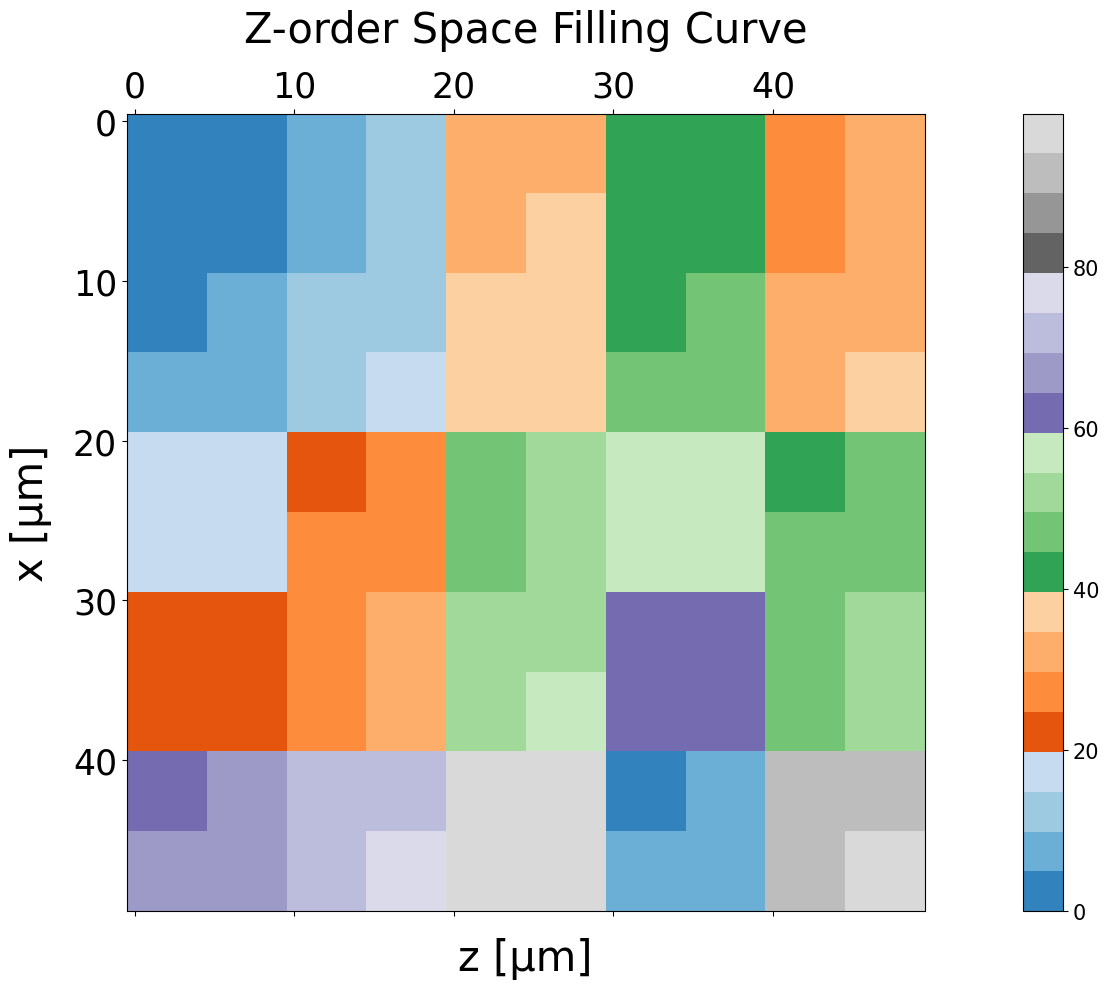

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import heapq

np.random.seed(42)

# Parameters
size = 50           
num_ranks = 100     
mean = 100000       
stdev = 250        
cmap_name = 'tab20c'

# ---------------------------
# Knapsack Assignment Function
# ---------------------------
def knapsack_assign(weights, num_bins):
    """
    A simplified knapsack-like assignment:
    - Sort tasks in descending order by weight.
    - Maintain a min-heap of (current_weight, bin_id).
    - Assign each task to the bin with the least load.
    - Return an array of bin assignments.
    
    weights: 1D array of task weights
    num_bins: number of bins to distribute tasks into
    """
    N = len(weights)
    
    # Sort tasks by weight descending
    sorted_indices = np.argsort(weights)[::-1]
    # Initialize bins: (current_weight, bin_id)
    bins = [(0, i) for i in range(num_bins)]
    heapq.heapify(bins)
    
    bin_assignments = np.zeros(N, dtype=int)
    
    # Assign tasks
    for idx in sorted_indices:
        w = weights[idx]
        cur_wt, bin_id = heapq.heappop(bins)   # Get the bin with least load
        cur_wt += w
        bin_assignments[idx] = bin_id
        heapq.heappush(bins, (cur_wt, bin_id)) # Put bin back with updated load
    
    return bin_assignments

# -------------------------------------
# Create Z-order Pattern for Comparison
# -------------------------------------
def create_zorder_pattern(size, num_ranks):
    """
    Creates a Z-order space-filling pattern:
    Divides the domain into blocks and assigns ranks based on interleaved bits of x, y.
    """
    def bit_interleave(x, y):
        z = 0
        max_bits = int(np.log2(size))
        for i in range(max_bits):
            z |= ( (x & (1 << i)) << i ) | ( (y & (1 << i)) << (i + 1))
        return z

    rank_array = np.zeros((size, size), dtype=int)
    # Choose a block size based on sqrt(num_ranks)
    block_size = int(size / np.sqrt(num_ranks))
    block_size = max(1, block_size)  # ensure at least 1
    
    # If block_size^2 < num_ranks, some ranks might not appear, but this is a demo.
    # In a real scenario, you'd ensure block_size chosen fits perfectly.
    for i in range(0, size, block_size):
        for j in range(0, size, block_size):
            x_block = i // block_size
            y_block = j // block_size
            rank = bit_interleave(x_block, y_block) % num_ranks
            rank_array[i:i + block_size, j:j + block_size] = rank
    
    return rank_array

# -----------------------
# Simulate Task Weights
# -----------------------
N = size * size
weights = np.random.normal(mean, stdev, N)

# -----------------------
# Knapsack Assignments
# -----------------------
# Assign tasks using knapsack-like distribution
bin_assignments_knapsack = knapsack_assign(weights, num_ranks)
data_knapsack = bin_assignments_knapsack.reshape((size, size))

# -----------------------
# Z-order Assignments
# -----------------------
data_zorder = create_zorder_pattern(size, num_ranks)

# -----------------------
# Plot the Results
# -----------------------

plt.figure(figsize=(20,10))
cax = plt.matshow(data_knapsack, cmap='tab20c', fignum=0)
plt.title('Knapsack Distribution', pad=20, fontsize=30)    # 'pad' adds space between title and plot
plt.xlabel('z [μm]', fontsize=30, labelpad=15)             # 'labelpad' adds space between label and ticks
plt.ylabel('x [μm]', fontsize=30, labelpad=15)
cbar = plt.colorbar(cax)
cbar.ax.tick_params(labelsize=15)                          # Increase colorbar tick label size
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()                                         # Adjust layout if needed
plt.savefig('./result/knapsack_distribution.png', dpi=600)
plt.show()

# Z-order Plot
plt.figure(figsize=(20,10))
cax = plt.matshow(data_zorder, cmap='tab20c', fignum=0)
plt.title('Z-order Space Filling Curve', pad=20, fontsize=30)
plt.xlabel('z [μm]', fontsize=30, labelpad=15)             # 'labelpad' adds space between label and ticks
plt.ylabel('x [μm]', fontsize=30, labelpad=15)
cbar = plt.colorbar(cax)
cbar.ax.tick_params(labelsize=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
plt.savefig('./result/zorder_sfc_distribution.png', dpi=600)
plt.show()


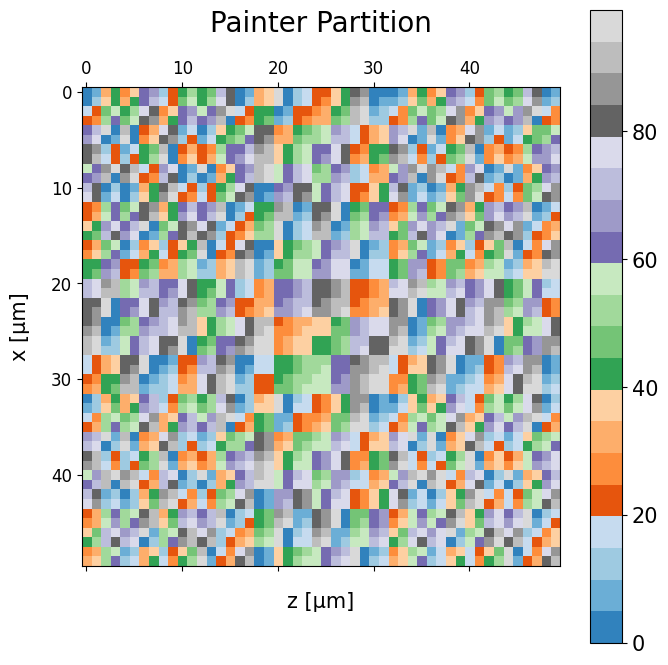

In [10]:
def painterPartition(size, num_ranks):
    """
    Simulates the Painter Partition algorithm using a space-filling curve (SFC) approach.
    
    Parameters:
        size (int): The size of the 2D grid (size x size).
        num_ranks (int): The number of processors (bins) for distributing tasks.
        
    Returns:
        np.array: A 2D grid where each element represents the rank assigned to that task.
    """
    def z_order_index(x, y, grid_size):
        """
        Compute Z-order (Morton) index for a 2D coordinate (x, y).
        """
        index = 0
        for i in range(int(np.log2(grid_size))):  # Log2(grid_size) bits required
            index |= (x & (1 << i)) << i | (y & (1 << i)) << (i + 1)
        return index

    # Initialize the task grid and assign ranks based on SFC
    rank_array = np.zeros((size, size), dtype=int)
    tasks = []
    grid_size = size

    # Generate the tasks with their Z-order indices
    for x in range(grid_size):
        for y in range(grid_size):
            z_index = z_order_index(x, y, grid_size)
            tasks.append((z_index, x, y))
    
    # Sort tasks by their Z-order index
    tasks.sort()

    # Assign tasks to ranks in a round-robin fashion
    for idx, (_, x, y) in enumerate(tasks):
        rank_array[x, y] = idx % num_ranks

    return rank_array

size = 50          # Grid size
num_ranks = 100    # Number of processors (bins)
data_painter = painterPartition(size, num_ranks)  # Generate the Painter Partition grid

# Plotting the Painter Partition result
plt.figure(figsize=(7, 7))
cax = plt.matshow(data_painter, cmap='tab20c', fignum=0)
plt.title('Painter Partition', pad=20, fontsize=20)
plt.xlabel('z [μm]', fontsize=15, labelpad=15)
plt.ylabel('x [μm]', fontsize=15, labelpad=15)
cbar = plt.colorbar(cax)
cbar.ax.tick_params(labelsize=15)  # Increase colorbar tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
# plt.savefig('painter_partition_distribution.png', dpi=600)
plt.show()